In [19]:
import torch
from torch.utils.data import DataLoader

from src.utils_data import load_PeMS04_flow_data, preprocess_PeMS_data, createLoaders, TimeSeriesDataset
from src.utils_graph import compute_laplacian_with_self_loop
from src.models import TGCN, GRUModel, LSTMModel, train_model

import pandas as pd

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Preprocessing data

In [20]:
df_PeMS, df_distance  = load_PeMS04_flow_data()
n_neighbors = 15
normalization = "divide_by_max"
df_PeMS, adjacency_matrix_PeMS, maximum = preprocess_PeMS_data(df_PeMS, df_distance, init_node=0, n_neighbors=n_neighbors, normalize=True)

c:\Users\gcogoni\Documents\Stage\Federated-Traffic-Flow-Forecasting\src\utils_graph.py:98: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(graph, nodelist=nodes_order, weight=None).toarray()


In [21]:
# Define the sliding window size and stride
_window_size = 7
_stride = 1

## TGCN

In [22]:
train_loader_TGCN, val_loader_TGCN, test_loader_TGCN = createLoaders(df_PeMS, window_size=_window_size, stride=_stride)
model_TGCN = TGCN(adjacency_matrix_PeMS, hidden_dim=32, output_size=len(df_PeMS.columns))

Epoch 1/100, Training Loss: 8.8428, Validation Loss: 0.0158
Epoch 2/100, Training Loss: 4.0338, Validation Loss: 0.0066
Epoch 3/100, Training Loss: 1.7413, Validation Loss: 0.0031
Epoch 4/100, Training Loss: 1.0138, Validation Loss: 0.0022
Epoch 5/100, Training Loss: 0.7810, Validation Loss: 0.0018
Epoch 6/100, Training Loss: 0.6740, Validation Loss: 0.0015
Epoch 7/100, Training Loss: 0.5989, Validation Loss: 0.0013
Epoch 8/100, Training Loss: 0.5397, Validation Loss: 0.0011
Epoch 9/100, Training Loss: 0.4943, Validation Loss: 0.0010
Epoch 10/100, Training Loss: 0.4634, Validation Loss: 0.0010
Epoch 11/100, Training Loss: 0.4444, Validation Loss: 0.0010
Epoch 12/100, Training Loss: 0.4307, Validation Loss: 0.0011
Epoch 13/100, Training Loss: 0.4239, Validation Loss: 0.0010
Epoch 14/100, Training Loss: 0.4138, Validation Loss: 0.0010
Epoch 15/100, Training Loss: 0.4047, Validation Loss: 0.0009
Epoch 16/100, Training Loss: 0.4056, Validation Loss: 0.0012
Epoch 17/100, Training Loss: 0.39

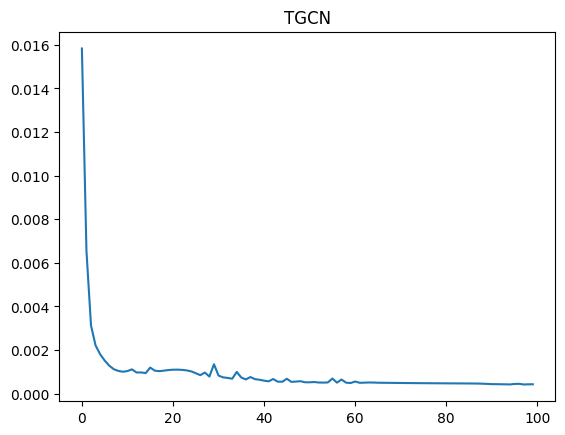

In [23]:
import matplotlib.pyplot as plt

num_epochs_TGCN = 100
model_path = f"./{normalization}/nb_captor_{n_neighbors+1}/epoch_{num_epochs_TGCN}/TGCN_model.pkl"
_ , valid_losses = train_model(model_TGCN, train_loader_TGCN, val_loader_TGCN, model_path=model_path, num_epochs=num_epochs_TGCN, remove=False)
plt.title("TGCN")
plt.plot(valid_losses, label="valid_losses")
plt.legend
plt.show()

## Univariate 

### LSTM

In [24]:
models_univaritate_LSTM = {}

for i in range(n_neighbors+1):
    print(f"LSTMModel {i}")
    train_loader, val_loader, test_loader = createLoaders(pd.DataFrame(df_PeMS.iloc[:, i]), window_size=_window_size, stride=_stride)
    models_univaritate_LSTM[f"LSTMModel {i}"] = {
                                                "model": LSTMModel(1, 32, 1),
                                                "train_loader": train_loader,
                                                "val_loader": val_loader,
                                                "test_loader": test_loader
    }

LSTMModel 0
LSTMModel 1
LSTMModel 2
LSTMModel 3
LSTMModel 4
LSTMModel 5
LSTMModel 6
LSTMModel 7
LSTMModel 8
LSTMModel 9
LSTMModel 10
LSTMModel 11
LSTMModel 12
LSTMModel 13
LSTMModel 14
LSTMModel 15


c:\Users\gcogoni\Documents\Stage\Federated-Traffic-Flow-Forecasting\env\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gcogoni\Documents\Stage\Federated-Traffic-Flow-Forecasting\env\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gcogoni\Documents\Stage\Federated-Traffic-Flow-Forecasting\env\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([14])) that is different to the input size (t

Epoch 1/200, Training Loss: 1.2213, Validation Loss: 0.0016
Epoch 2/200, Training Loss: 0.4116, Validation Loss: 0.0004
Epoch 3/200, Training Loss: 0.1395, Validation Loss: 0.0004
Epoch 4/200, Training Loss: 0.1313, Validation Loss: 0.0004
Epoch 5/200, Training Loss: 0.1307, Validation Loss: 0.0004
Epoch 6/200, Training Loss: 0.1308, Validation Loss: 0.0004
Epoch 7/200, Training Loss: 0.1308, Validation Loss: 0.0004
Epoch 8/200, Training Loss: 0.1304, Validation Loss: 0.0004
Epoch 9/200, Training Loss: 0.1297, Validation Loss: 0.0004
Epoch 10/200, Training Loss: 0.1288, Validation Loss: 0.0004
Epoch 11/200, Training Loss: 0.1279, Validation Loss: 0.0004
Epoch 12/200, Training Loss: 0.1270, Validation Loss: 0.0004
Epoch 13/200, Training Loss: 0.1261, Validation Loss: 0.0004
Epoch 14/200, Training Loss: 0.1252, Validation Loss: 0.0004
Epoch 15/200, Training Loss: 0.1243, Validation Loss: 0.0004
Epoch 16/200, Training Loss: 0.1235, Validation Loss: 0.0004
Epoch 17/200, Training Loss: 0.12

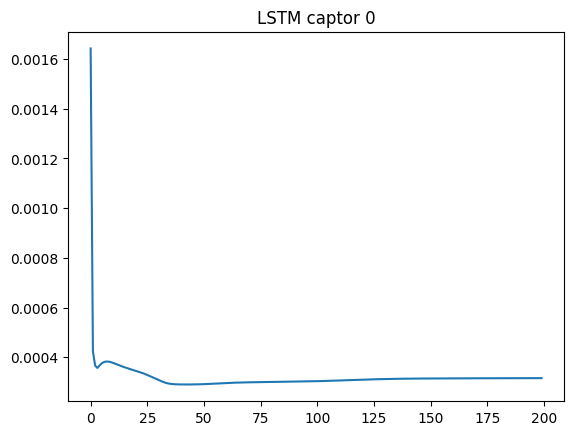

Epoch 1/200, Training Loss: 1.9498, Validation Loss: 0.0027
Epoch 2/200, Training Loss: 0.4772, Validation Loss: 0.0020
Epoch 3/200, Training Loss: 0.4354, Validation Loss: 0.0019
Epoch 4/200, Training Loss: 0.4296, Validation Loss: 0.0019
Epoch 5/200, Training Loss: 0.4259, Validation Loss: 0.0018
Epoch 6/200, Training Loss: 0.4222, Validation Loss: 0.0018
Epoch 7/200, Training Loss: 0.4183, Validation Loss: 0.0018
Epoch 8/200, Training Loss: 0.4141, Validation Loss: 0.0018
Epoch 9/200, Training Loss: 0.4100, Validation Loss: 0.0019
Epoch 10/200, Training Loss: 0.4069, Validation Loss: 0.0019
Epoch 11/200, Training Loss: 0.4045, Validation Loss: 0.0021
Epoch 12/200, Training Loss: 0.3985, Validation Loss: 0.0023
Epoch 13/200, Training Loss: 0.3893, Validation Loss: 0.0025
Epoch 14/200, Training Loss: 0.3855, Validation Loss: 0.0026
Epoch 15/200, Training Loss: 0.3806, Validation Loss: 0.0023
Epoch 16/200, Training Loss: 0.3720, Validation Loss: 0.0020
Epoch 17/200, Training Loss: 0.36

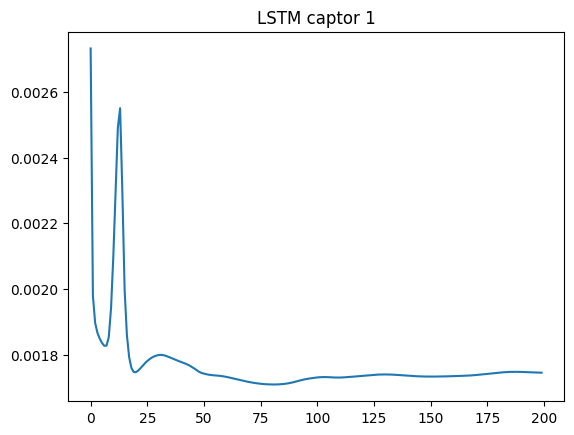

Epoch 1/200, Training Loss: 3.2842, Validation Loss: 0.0022
Epoch 2/200, Training Loss: 0.7322, Validation Loss: 0.0015
Epoch 3/200, Training Loss: 0.6760, Validation Loss: 0.0015
Epoch 4/200, Training Loss: 0.6645, Validation Loss: 0.0015
Epoch 5/200, Training Loss: 0.6582, Validation Loss: 0.0015
Epoch 6/200, Training Loss: 0.6543, Validation Loss: 0.0015
Epoch 7/200, Training Loss: 0.6511, Validation Loss: 0.0015
Epoch 8/200, Training Loss: 0.6482, Validation Loss: 0.0015
Epoch 9/200, Training Loss: 0.6453, Validation Loss: 0.0015
Epoch 10/200, Training Loss: 0.6424, Validation Loss: 0.0015
Epoch 11/200, Training Loss: 0.6395, Validation Loss: 0.0015
Epoch 12/200, Training Loss: 0.6363, Validation Loss: 0.0015
Epoch 13/200, Training Loss: 0.6327, Validation Loss: 0.0015
Epoch 14/200, Training Loss: 0.6286, Validation Loss: 0.0015
Epoch 15/200, Training Loss: 0.6238, Validation Loss: 0.0015
Epoch 16/200, Training Loss: 0.6182, Validation Loss: 0.0015
Epoch 17/200, Training Loss: 0.61

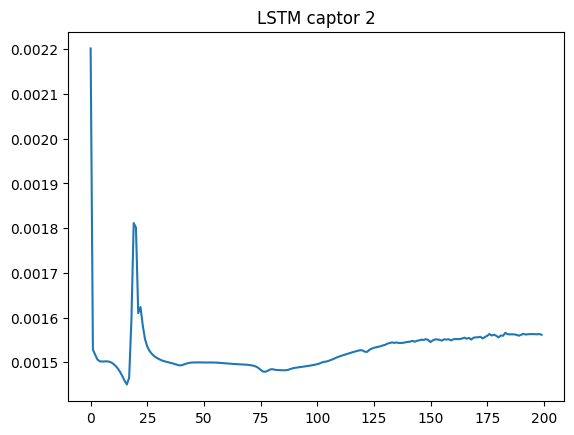

Epoch 1/200, Training Loss: 3.0063, Validation Loss: 0.0023
Epoch 2/200, Training Loss: 0.6980, Validation Loss: 0.0020
Epoch 3/200, Training Loss: 0.6895, Validation Loss: 0.0019
Epoch 4/200, Training Loss: 0.6845, Validation Loss: 0.0019
Epoch 5/200, Training Loss: 0.6822, Validation Loss: 0.0019
Epoch 6/200, Training Loss: 0.6803, Validation Loss: 0.0019
Epoch 7/200, Training Loss: 0.6782, Validation Loss: 0.0019
Epoch 8/200, Training Loss: 0.6758, Validation Loss: 0.0019
Epoch 9/200, Training Loss: 0.6733, Validation Loss: 0.0018
Epoch 10/200, Training Loss: 0.6705, Validation Loss: 0.0018
Epoch 11/200, Training Loss: 0.6677, Validation Loss: 0.0018
Epoch 12/200, Training Loss: 0.6647, Validation Loss: 0.0018
Epoch 13/200, Training Loss: 0.6618, Validation Loss: 0.0018
Epoch 14/200, Training Loss: 0.6588, Validation Loss: 0.0018
Epoch 15/200, Training Loss: 0.6557, Validation Loss: 0.0018
Epoch 16/200, Training Loss: 0.6527, Validation Loss: 0.0018
Epoch 17/200, Training Loss: 0.64

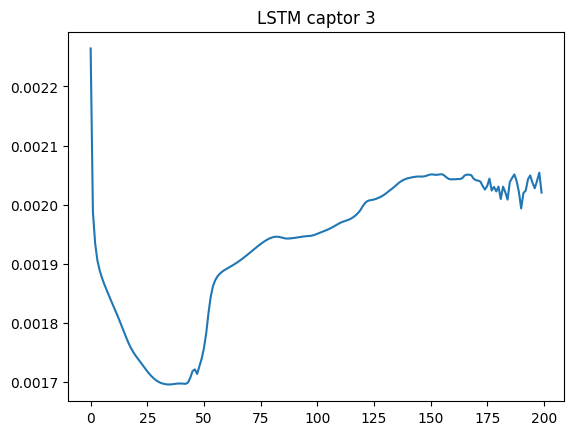

Epoch 1/200, Training Loss: 3.4081, Validation Loss: 0.0053
Epoch 2/200, Training Loss: 0.6849, Validation Loss: 0.0023
Epoch 3/200, Training Loss: 0.5785, Validation Loss: 0.0026
Epoch 4/200, Training Loss: 0.5629, Validation Loss: 0.0028
Epoch 5/200, Training Loss: 0.5617, Validation Loss: 0.0027
Epoch 6/200, Training Loss: 0.5553, Validation Loss: 0.0025
Epoch 7/200, Training Loss: 0.5485, Validation Loss: 0.0024
Epoch 8/200, Training Loss: 0.5426, Validation Loss: 0.0024
Epoch 9/200, Training Loss: 0.5370, Validation Loss: 0.0023
Epoch 10/200, Training Loss: 0.5315, Validation Loss: 0.0023
Epoch 11/200, Training Loss: 0.5262, Validation Loss: 0.0022
Epoch 12/200, Training Loss: 0.5209, Validation Loss: 0.0022
Epoch 13/200, Training Loss: 0.5155, Validation Loss: 0.0022
Epoch 14/200, Training Loss: 0.5096, Validation Loss: 0.0022
Epoch 15/200, Training Loss: 0.5033, Validation Loss: 0.0022
Epoch 16/200, Training Loss: 0.4955, Validation Loss: 0.0022
Epoch 17/200, Training Loss: 0.48

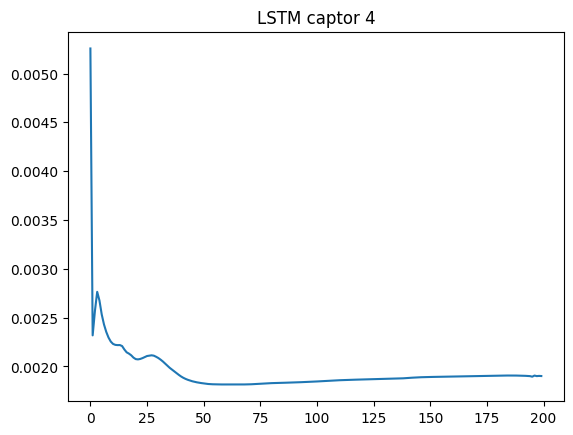

Epoch 1/200, Training Loss: 6.0287, Validation Loss: 0.0064
Epoch 2/200, Training Loss: 2.1711, Validation Loss: 0.0065
Epoch 3/200, Training Loss: 2.1350, Validation Loss: 0.0063
Epoch 4/200, Training Loss: 2.1138, Validation Loss: 0.0061
Epoch 5/200, Training Loss: 2.0959, Validation Loss: 0.0060
Epoch 6/200, Training Loss: 2.0791, Validation Loss: 0.0059
Epoch 7/200, Training Loss: 2.0618, Validation Loss: 0.0058
Epoch 8/200, Training Loss: 2.0434, Validation Loss: 0.0057
Epoch 9/200, Training Loss: 2.0236, Validation Loss: 0.0057
Epoch 10/200, Training Loss: 2.0017, Validation Loss: 0.0057
Epoch 11/200, Training Loss: 1.9774, Validation Loss: 0.0057
Epoch 12/200, Training Loss: 1.9499, Validation Loss: 0.0057
Epoch 13/200, Training Loss: 1.9184, Validation Loss: 0.0057
Epoch 14/200, Training Loss: 1.8836, Validation Loss: 0.0056
Epoch 15/200, Training Loss: 1.8485, Validation Loss: 0.0056
Epoch 16/200, Training Loss: 1.8184, Validation Loss: 0.0055
Epoch 17/200, Training Loss: 1.79

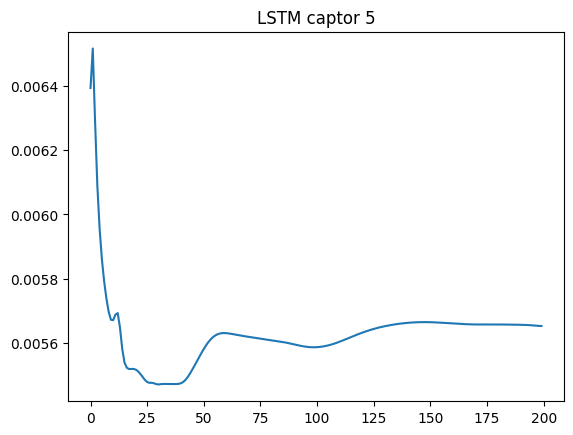

Epoch 1/200, Training Loss: 4.8220, Validation Loss: 0.0042
Epoch 2/200, Training Loss: 1.1027, Validation Loss: 0.0031
Epoch 3/200, Training Loss: 1.0315, Validation Loss: 0.0030
Epoch 4/200, Training Loss: 1.0013, Validation Loss: 0.0030
Epoch 5/200, Training Loss: 0.9851, Validation Loss: 0.0030
Epoch 6/200, Training Loss: 0.9752, Validation Loss: 0.0030
Epoch 7/200, Training Loss: 0.9682, Validation Loss: 0.0030
Epoch 8/200, Training Loss: 0.9622, Validation Loss: 0.0030
Epoch 9/200, Training Loss: 0.9563, Validation Loss: 0.0030
Epoch 10/200, Training Loss: 0.9498, Validation Loss: 0.0030
Epoch 11/200, Training Loss: 0.9427, Validation Loss: 0.0030
Epoch 12/200, Training Loss: 0.9349, Validation Loss: 0.0030
Epoch 13/200, Training Loss: 0.9263, Validation Loss: 0.0029
Epoch 14/200, Training Loss: 0.9168, Validation Loss: 0.0029
Epoch 15/200, Training Loss: 0.9064, Validation Loss: 0.0028
Epoch 16/200, Training Loss: 0.8954, Validation Loss: 0.0028
Epoch 17/200, Training Loss: 0.88

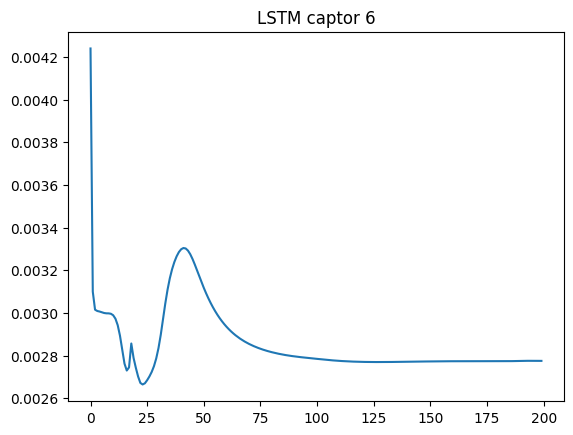

Epoch 1/200, Training Loss: 7.5020, Validation Loss: 0.0039
Epoch 2/200, Training Loss: 1.8901, Validation Loss: 0.0037
Epoch 3/200, Training Loss: 1.7771, Validation Loss: 0.0037
Epoch 4/200, Training Loss: 1.7190, Validation Loss: 0.0036
Epoch 5/200, Training Loss: 1.6819, Validation Loss: 0.0036
Epoch 6/200, Training Loss: 1.6543, Validation Loss: 0.0036
Epoch 7/200, Training Loss: 1.6346, Validation Loss: 0.0036
Epoch 8/200, Training Loss: 1.6191, Validation Loss: 0.0036
Epoch 9/200, Training Loss: 1.6061, Validation Loss: 0.0035
Epoch 10/200, Training Loss: 1.5956, Validation Loss: 0.0035
Epoch 11/200, Training Loss: 1.5853, Validation Loss: 0.0035
Epoch 12/200, Training Loss: 1.6522, Validation Loss: 0.0052
Epoch 13/200, Training Loss: 1.5909, Validation Loss: 0.0034
Epoch 14/200, Training Loss: 1.5528, Validation Loss: 0.0038
Epoch 15/200, Training Loss: 1.4972, Validation Loss: 0.0033
Epoch 16/200, Training Loss: 1.4989, Validation Loss: 0.0036
Epoch 17/200, Training Loss: 1.43

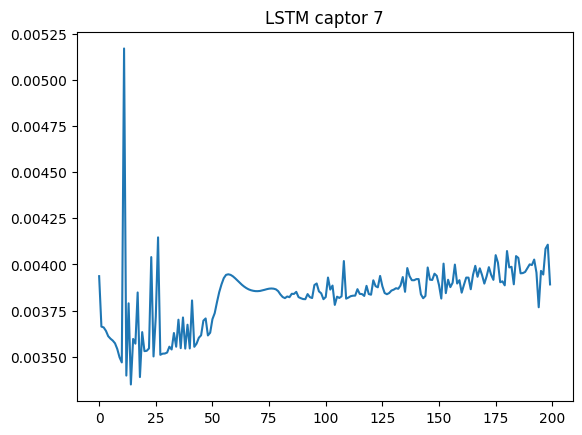

Epoch 1/200, Training Loss: 5.8851, Validation Loss: 0.0058
Epoch 2/200, Training Loss: 1.7433, Validation Loss: 0.0052
Epoch 3/200, Training Loss: 1.7005, Validation Loss: 0.0051
Epoch 4/200, Training Loss: 1.6837, Validation Loss: 0.0051
Epoch 5/200, Training Loss: 1.6711, Validation Loss: 0.0051
Epoch 6/200, Training Loss: 1.6591, Validation Loss: 0.0051
Epoch 7/200, Training Loss: 1.6464, Validation Loss: 0.0050
Epoch 8/200, Training Loss: 1.6325, Validation Loss: 0.0050
Epoch 9/200, Training Loss: 1.6171, Validation Loss: 0.0050
Epoch 10/200, Training Loss: 1.6004, Validation Loss: 0.0050
Epoch 11/200, Training Loss: 1.5835, Validation Loss: 0.0050
Epoch 12/200, Training Loss: 1.5664, Validation Loss: 0.0052
Epoch 13/200, Training Loss: 1.5450, Validation Loss: 0.0053
Epoch 14/200, Training Loss: 1.5170, Validation Loss: 0.0053
Epoch 15/200, Training Loss: 1.4831, Validation Loss: 0.0053
Epoch 16/200, Training Loss: 1.4427, Validation Loss: 0.0050
Epoch 17/200, Training Loss: 1.40

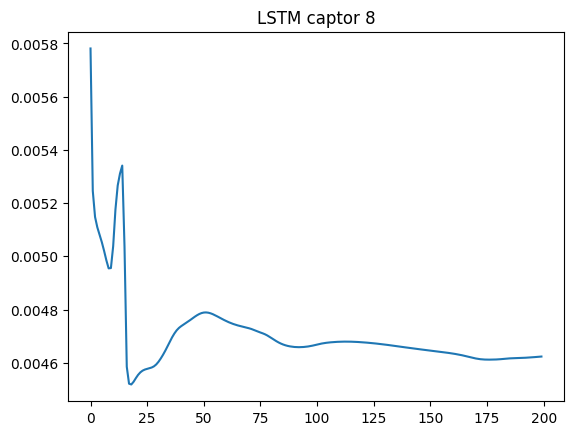

Epoch 1/200, Training Loss: 9.0954, Validation Loss: 0.0074
Epoch 2/200, Training Loss: 2.9017, Validation Loss: 0.0062
Epoch 3/200, Training Loss: 2.9302, Validation Loss: 0.0119
Epoch 4/200, Training Loss: 2.7185, Validation Loss: 0.0072
Epoch 5/200, Training Loss: 2.6316, Validation Loss: 0.0069
Epoch 6/200, Training Loss: 2.6150, Validation Loss: 0.0066
Epoch 7/200, Training Loss: 2.5982, Validation Loss: 0.0065
Epoch 8/200, Training Loss: 2.5823, Validation Loss: 0.0065
Epoch 9/200, Training Loss: 2.5653, Validation Loss: 0.0065
Epoch 10/200, Training Loss: 2.5460, Validation Loss: 0.0065
Epoch 11/200, Training Loss: 2.5238, Validation Loss: 0.0065
Epoch 12/200, Training Loss: 2.5002, Validation Loss: 0.0065
Epoch 13/200, Training Loss: 2.4946, Validation Loss: 0.0064
Epoch 14/200, Training Loss: 2.4448, Validation Loss: 0.0092
Epoch 15/200, Training Loss: 2.4422, Validation Loss: 0.0081
Epoch 16/200, Training Loss: 2.4061, Validation Loss: 0.0063
Epoch 17/200, Training Loss: 2.30

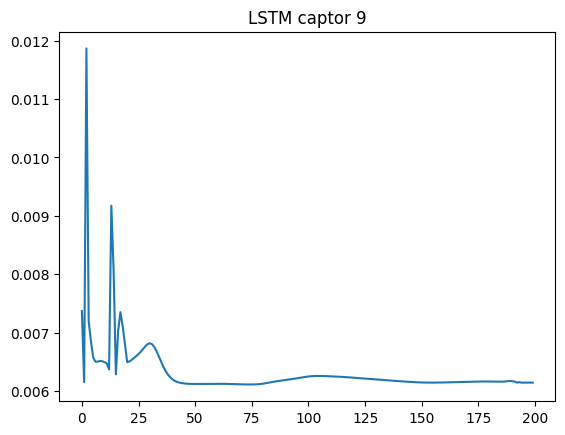

Epoch 1/200, Training Loss: 7.8907, Validation Loss: 0.0069
Epoch 2/200, Training Loss: 2.7656, Validation Loss: 0.0064
Epoch 3/200, Training Loss: 2.5952, Validation Loss: 0.0067
Epoch 4/200, Training Loss: 2.5548, Validation Loss: 0.0070
Epoch 5/200, Training Loss: 2.5281, Validation Loss: 0.0065
Epoch 6/200, Training Loss: 2.5029, Validation Loss: 0.0065
Epoch 7/200, Training Loss: 2.4857, Validation Loss: 0.0064
Epoch 8/200, Training Loss: 2.4690, Validation Loss: 0.0064
Epoch 9/200, Training Loss: 2.4523, Validation Loss: 0.0064
Epoch 10/200, Training Loss: 2.4348, Validation Loss: 0.0064
Epoch 11/200, Training Loss: 2.4157, Validation Loss: 0.0064
Epoch 12/200, Training Loss: 2.3933, Validation Loss: 0.0063
Epoch 13/200, Training Loss: 2.3646, Validation Loss: 0.0062
Epoch 14/200, Training Loss: 2.3255, Validation Loss: 0.0061
Epoch 15/200, Training Loss: 2.2863, Validation Loss: 0.0061
Epoch 16/200, Training Loss: 2.2487, Validation Loss: 0.0060
Epoch 17/200, Training Loss: 2.21

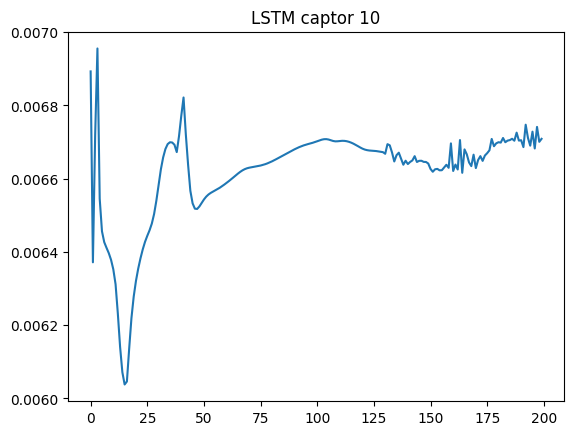

Epoch 1/200, Training Loss: 7.9694, Validation Loss: 0.0091
Epoch 2/200, Training Loss: 2.4923, Validation Loss: 0.0087
Epoch 3/200, Training Loss: 2.3878, Validation Loss: 0.0085
Epoch 4/200, Training Loss: 2.3378, Validation Loss: 0.0083
Epoch 5/200, Training Loss: 2.3046, Validation Loss: 0.0080
Epoch 6/200, Training Loss: 2.2778, Validation Loss: 0.0078
Epoch 7/200, Training Loss: 2.2534, Validation Loss: 0.0076
Epoch 8/200, Training Loss: 2.2310, Validation Loss: 0.0075
Epoch 9/200, Training Loss: 2.2102, Validation Loss: 0.0073
Epoch 10/200, Training Loss: 2.1902, Validation Loss: 0.0072
Epoch 11/200, Training Loss: 2.1701, Validation Loss: 0.0070
Epoch 12/200, Training Loss: 2.1497, Validation Loss: 0.0069
Epoch 13/200, Training Loss: 2.1290, Validation Loss: 0.0068
Epoch 14/200, Training Loss: 2.1079, Validation Loss: 0.0067
Epoch 15/200, Training Loss: 2.0867, Validation Loss: 0.0067
Epoch 16/200, Training Loss: 2.0657, Validation Loss: 0.0066
Epoch 17/200, Training Loss: 2.04

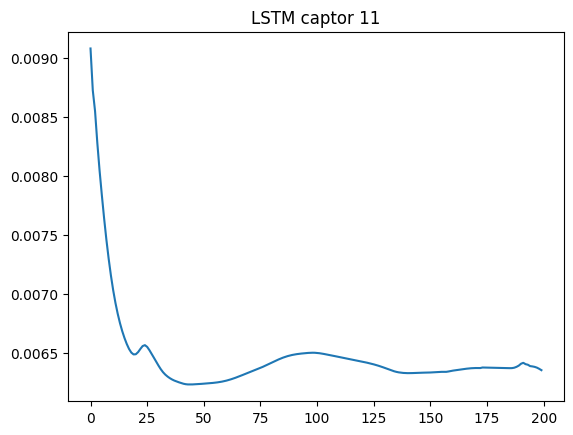

Epoch 1/200, Training Loss: 14.4559, Validation Loss: 0.0100
Epoch 2/200, Training Loss: 4.7745, Validation Loss: 0.0098
Epoch 3/200, Training Loss: 4.6683, Validation Loss: 0.0098
Epoch 4/200, Training Loss: 4.6268, Validation Loss: 0.0097
Epoch 5/200, Training Loss: 4.5952, Validation Loss: 0.0095
Epoch 6/200, Training Loss: 4.5671, Validation Loss: 0.0092
Epoch 7/200, Training Loss: 4.5410, Validation Loss: 0.0090
Epoch 8/200, Training Loss: 4.5159, Validation Loss: 0.0088
Epoch 9/200, Training Loss: 4.4917, Validation Loss: 0.0085
Epoch 10/200, Training Loss: 4.4680, Validation Loss: 0.0083
Epoch 11/200, Training Loss: 4.4448, Validation Loss: 0.0082
Epoch 12/200, Training Loss: 4.4221, Validation Loss: 0.0080
Epoch 13/200, Training Loss: 4.3997, Validation Loss: 0.0079
Epoch 14/200, Training Loss: 4.3778, Validation Loss: 0.0078
Epoch 15/200, Training Loss: 4.3562, Validation Loss: 0.0077
Epoch 16/200, Training Loss: 4.3352, Validation Loss: 0.0077
Epoch 17/200, Training Loss: 4.3

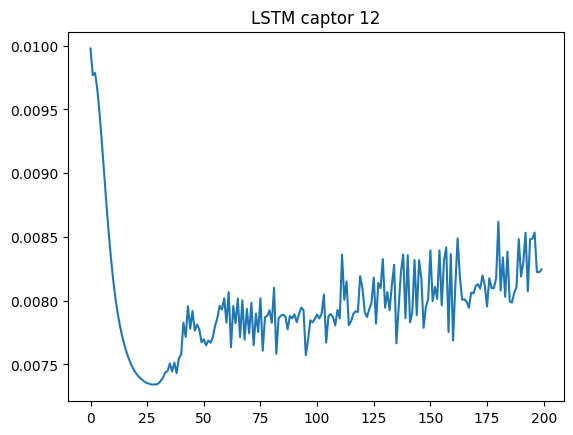

Epoch 1/200, Training Loss: 13.1835, Validation Loss: 0.0086
Epoch 2/200, Training Loss: 3.2588, Validation Loss: 0.0078
Epoch 3/200, Training Loss: 2.9764, Validation Loss: 0.0079
Epoch 4/200, Training Loss: 2.9390, Validation Loss: 0.0078
Epoch 5/200, Training Loss: 2.9069, Validation Loss: 0.0077
Epoch 6/200, Training Loss: 2.8738, Validation Loss: 0.0077
Epoch 7/200, Training Loss: 2.8636, Validation Loss: 0.0077
Epoch 8/200, Training Loss: 2.9039, Validation Loss: 0.0078
Epoch 9/200, Training Loss: 2.8309, Validation Loss: 0.0075
Epoch 10/200, Training Loss: 2.7767, Validation Loss: 0.0075
Epoch 11/200, Training Loss: 2.7253, Validation Loss: 0.0073
Epoch 12/200, Training Loss: 2.6506, Validation Loss: 0.0073
Epoch 13/200, Training Loss: 2.5950, Validation Loss: 0.0074
Epoch 14/200, Training Loss: 2.5617, Validation Loss: 0.0074
Epoch 15/200, Training Loss: 2.5338, Validation Loss: 0.0073
Epoch 16/200, Training Loss: 2.5192, Validation Loss: 0.0073
Epoch 17/200, Training Loss: 2.5

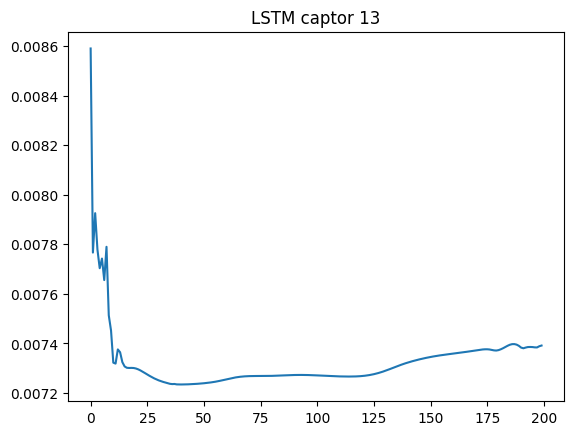

Epoch 1/200, Training Loss: 8.2048, Validation Loss: 0.0078
Epoch 2/200, Training Loss: 2.3103, Validation Loss: 0.0064
Epoch 3/200, Training Loss: 2.1635, Validation Loss: 0.0060
Epoch 4/200, Training Loss: 2.0987, Validation Loss: 0.0059
Epoch 5/200, Training Loss: 2.0698, Validation Loss: 0.0059
Epoch 6/200, Training Loss: 2.0535, Validation Loss: 0.0059
Epoch 7/200, Training Loss: 2.0401, Validation Loss: 0.0059
Epoch 8/200, Training Loss: 2.0274, Validation Loss: 0.0059
Epoch 9/200, Training Loss: 2.0147, Validation Loss: 0.0059
Epoch 10/200, Training Loss: 2.0020, Validation Loss: 0.0059
Epoch 11/200, Training Loss: 1.9893, Validation Loss: 0.0058
Epoch 12/200, Training Loss: 1.9766, Validation Loss: 0.0058
Epoch 13/200, Training Loss: 1.9638, Validation Loss: 0.0058
Epoch 14/200, Training Loss: 1.9506, Validation Loss: 0.0058
Epoch 15/200, Training Loss: 1.9368, Validation Loss: 0.0057
Epoch 16/200, Training Loss: 1.9216, Validation Loss: 0.0057
Epoch 17/200, Training Loss: 1.90

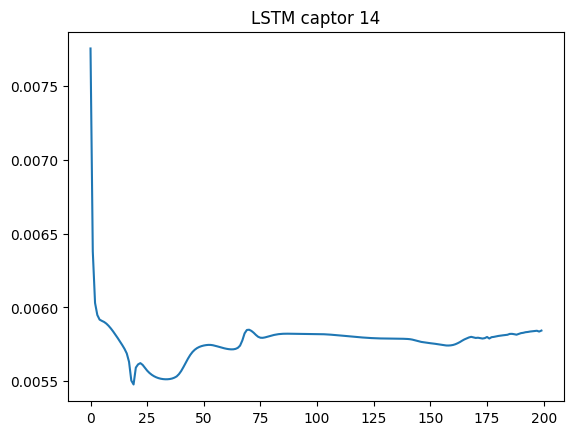

Epoch 1/200, Training Loss: 18.6356, Validation Loss: 0.0122
Epoch 2/200, Training Loss: 4.9093, Validation Loss: 0.0111
Epoch 3/200, Training Loss: 4.6706, Validation Loss: 0.0109
Epoch 4/200, Training Loss: 4.5443, Validation Loss: 0.0109
Epoch 5/200, Training Loss: 4.4541, Validation Loss: 0.0109
Epoch 6/200, Training Loss: 4.3872, Validation Loss: 0.0109
Epoch 7/200, Training Loss: 4.3321, Validation Loss: 0.0109
Epoch 8/200, Training Loss: 4.2830, Validation Loss: 0.0108
Epoch 9/200, Training Loss: 4.2362, Validation Loss: 0.0108
Epoch 10/200, Training Loss: 4.1887, Validation Loss: 0.0108
Epoch 11/200, Training Loss: 4.1372, Validation Loss: 0.0108
Epoch 12/200, Training Loss: 4.0797, Validation Loss: 0.0107
Epoch 13/200, Training Loss: 4.0206, Validation Loss: 0.0103
Epoch 14/200, Training Loss: 4.0873, Validation Loss: 0.0097
Epoch 15/200, Training Loss: 3.9561, Validation Loss: 0.0157
Epoch 16/200, Training Loss: 4.1649, Validation Loss: 0.0100
Epoch 17/200, Training Loss: 3.6

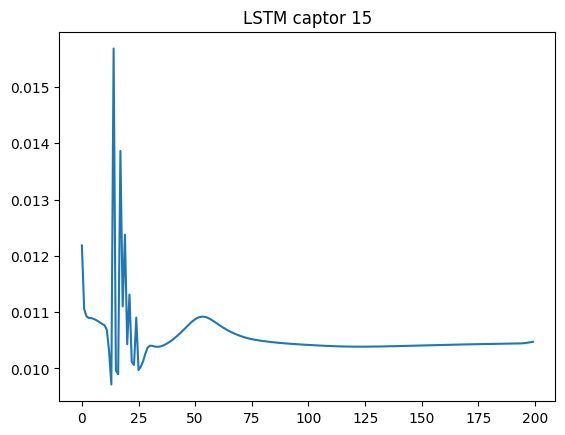

In [25]:
num_epochs_LSTM = 200

for i in range(n_neighbors+1):
    _, valid_losses = train_model(models_univaritate_LSTM[f"LSTMModel {i}"]["model"], 
                models_univaritate_LSTM[f"LSTMModel {i}"]["train_loader"], 
                models_univaritate_LSTM[f"LSTMModel {i}"]["val_loader"], 
                f"./{normalization}/nb_captor_{n_neighbors+1}/epoch_{num_epochs_LSTM}/univariate_LSTM_model_{i}.pkl", num_epochs=num_epochs_LSTM, remove=False)
    plt.title(f"LSTM captor {i}")
    plt.plot(valid_losses, label="valid_losses")
    plt.legend
    plt.show()

### GRU

In [26]:
models_univaritate_GRU = {}

for i in range(n_neighbors+1):
    print(f"GRUModel {i}")
    train_loader, val_loader, test_loader = createLoaders(pd.DataFrame(df_PeMS.iloc[:, i]), window_size=_window_size, stride=_stride)
    models_univaritate_GRU[f"GRUModel {i}"] = { 
                                                "model": GRUModel(1, 32, 1),
                                                "train_loader": train_loader,
                                                "val_loader": val_loader,
                                                "test_loader": test_loader
    }

GRUModel 0
GRUModel 1
GRUModel 2
GRUModel 3
GRUModel 4
GRUModel 5
GRUModel 6
GRUModel 7
GRUModel 8
GRUModel 9
GRUModel 10
GRUModel 11
GRUModel 12
GRUModel 13
GRUModel 14
GRUModel 15


Epoch 1/200, Training Loss: 0.7081, Validation Loss: 0.0005
Epoch 2/200, Training Loss: 0.1334, Validation Loss: 0.0004
Epoch 3/200, Training Loss: 0.1289, Validation Loss: 0.0004
Epoch 4/200, Training Loss: 0.1289, Validation Loss: 0.0004
Epoch 5/200, Training Loss: 0.1281, Validation Loss: 0.0004
Epoch 6/200, Training Loss: 0.1267, Validation Loss: 0.0004
Epoch 7/200, Training Loss: 0.1251, Validation Loss: 0.0003
Epoch 8/200, Training Loss: 0.1234, Validation Loss: 0.0003
Epoch 9/200, Training Loss: 0.1217, Validation Loss: 0.0003
Epoch 10/200, Training Loss: 0.1202, Validation Loss: 0.0003
Epoch 11/200, Training Loss: 0.1188, Validation Loss: 0.0003
Epoch 12/200, Training Loss: 0.1175, Validation Loss: 0.0003
Epoch 13/200, Training Loss: 0.1160, Validation Loss: 0.0003
Epoch 14/200, Training Loss: 0.1149, Validation Loss: 0.0003
Epoch 15/200, Training Loss: 0.1136, Validation Loss: 0.0003
Epoch 16/200, Training Loss: 0.1125, Validation Loss: 0.0003
Epoch 17/200, Training Loss: 0.11

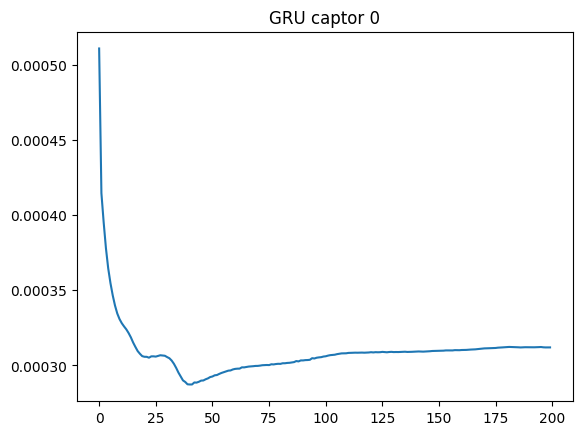

Epoch 1/200, Training Loss: 1.4230, Validation Loss: 0.0019
Epoch 2/200, Training Loss: 0.4275, Validation Loss: 0.0019
Epoch 3/200, Training Loss: 0.4249, Validation Loss: 0.0019
Epoch 4/200, Training Loss: 0.4172, Validation Loss: 0.0019
Epoch 5/200, Training Loss: 0.4133, Validation Loss: 0.0017
Epoch 6/200, Training Loss: 0.3945, Validation Loss: 0.0017
Epoch 7/200, Training Loss: 0.4721, Validation Loss: 0.0021
Epoch 8/200, Training Loss: 0.3755, Validation Loss: 0.0019
Epoch 9/200, Training Loss: 0.3785, Validation Loss: 0.0021
Epoch 10/200, Training Loss: 0.3774, Validation Loss: 0.0021
Epoch 11/200, Training Loss: 0.3808, Validation Loss: 0.0021
Epoch 12/200, Training Loss: 0.3748, Validation Loss: 0.0020
Epoch 13/200, Training Loss: 0.3655, Validation Loss: 0.0019
Epoch 14/200, Training Loss: 0.3589, Validation Loss: 0.0018
Epoch 15/200, Training Loss: 0.3551, Validation Loss: 0.0017
Epoch 16/200, Training Loss: 0.3534, Validation Loss: 0.0017
Epoch 17/200, Training Loss: 0.35

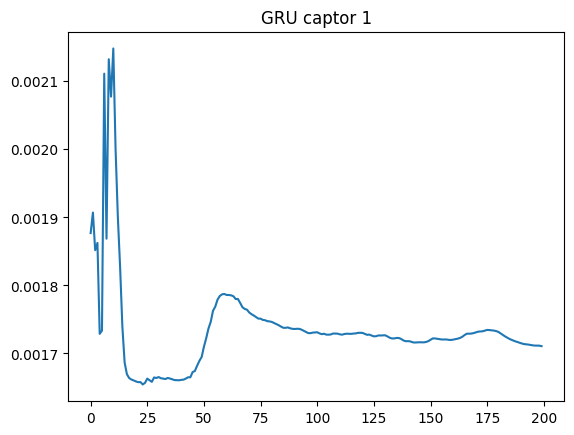

Epoch 1/200, Training Loss: 2.0196, Validation Loss: 0.0015
Epoch 2/200, Training Loss: 0.6663, Validation Loss: 0.0015
Epoch 3/200, Training Loss: 0.6707, Validation Loss: 0.0015
Epoch 4/200, Training Loss: 0.6648, Validation Loss: 0.0015
Epoch 5/200, Training Loss: 0.6553, Validation Loss: 0.0014
Epoch 6/200, Training Loss: 0.6453, Validation Loss: 0.0014
Epoch 7/200, Training Loss: 0.6350, Validation Loss: 0.0014
Epoch 8/200, Training Loss: 0.6265, Validation Loss: 0.0014
Epoch 9/200, Training Loss: 0.6227, Validation Loss: 0.0014
Epoch 10/200, Training Loss: 0.6132, Validation Loss: 0.0014
Epoch 11/200, Training Loss: 0.5995, Validation Loss: 0.0014
Epoch 12/200, Training Loss: 0.5952, Validation Loss: 0.0014
Epoch 13/200, Training Loss: 0.5895, Validation Loss: 0.0014
Epoch 14/200, Training Loss: 0.5852, Validation Loss: 0.0015
Epoch 15/200, Training Loss: 0.5815, Validation Loss: 0.0016
Epoch 16/200, Training Loss: 0.5790, Validation Loss: 0.0017
Epoch 17/200, Training Loss: 0.57

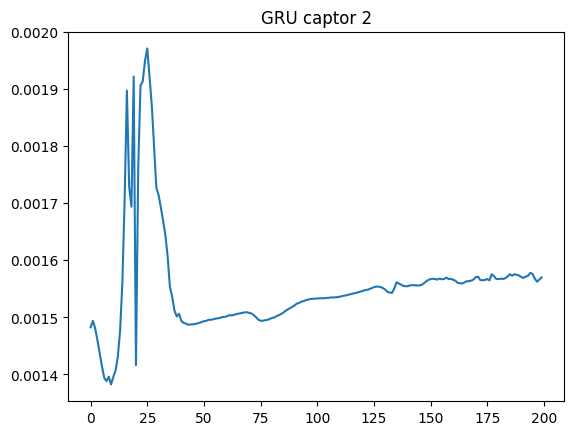

Epoch 1/200, Training Loss: 2.5225, Validation Loss: 0.0019
Epoch 2/200, Training Loss: 0.6963, Validation Loss: 0.0019
Epoch 3/200, Training Loss: 0.6970, Validation Loss: 0.0018
Epoch 4/200, Training Loss: 0.7368, Validation Loss: 0.0020
Epoch 5/200, Training Loss: 0.6767, Validation Loss: 0.0020
Epoch 6/200, Training Loss: 0.6741, Validation Loss: 0.0020
Epoch 7/200, Training Loss: 0.6712, Validation Loss: 0.0020
Epoch 8/200, Training Loss: 0.6676, Validation Loss: 0.0020
Epoch 9/200, Training Loss: 0.6650, Validation Loss: 0.0020
Epoch 10/200, Training Loss: 0.6642, Validation Loss: 0.0021
Epoch 11/200, Training Loss: 0.6631, Validation Loss: 0.0021
Epoch 12/200, Training Loss: 0.6620, Validation Loss: 0.0020
Epoch 13/200, Training Loss: 0.6547, Validation Loss: 0.0019
Epoch 14/200, Training Loss: 0.6489, Validation Loss: 0.0019
Epoch 15/200, Training Loss: 0.6448, Validation Loss: 0.0019
Epoch 16/200, Training Loss: 0.6415, Validation Loss: 0.0019
Epoch 17/200, Training Loss: 0.63

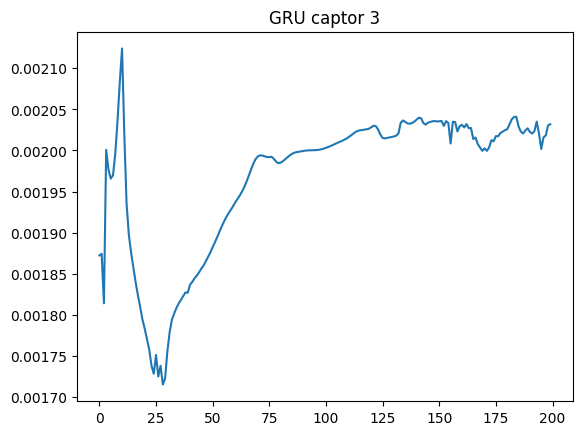

Epoch 1/200, Training Loss: 2.0054, Validation Loss: 0.0020
Epoch 2/200, Training Loss: 0.5628, Validation Loss: 0.0018
Epoch 3/200, Training Loss: 0.5574, Validation Loss: 0.0019
Epoch 4/200, Training Loss: 0.5471, Validation Loss: 0.0019
Epoch 5/200, Training Loss: 0.5456, Validation Loss: 0.0018
Epoch 6/200, Training Loss: 0.5322, Validation Loss: 0.0020
Epoch 7/200, Training Loss: 0.5198, Validation Loss: 0.0021
Epoch 8/200, Training Loss: 0.5905, Validation Loss: 0.0018
Epoch 9/200, Training Loss: 0.4773, Validation Loss: 0.0019
Epoch 10/200, Training Loss: 0.5362, Validation Loss: 0.0027
Epoch 11/200, Training Loss: 0.4906, Validation Loss: 0.0021
Epoch 12/200, Training Loss: 0.5011, Validation Loss: 0.0026
Epoch 13/200, Training Loss: 0.4834, Validation Loss: 0.0026
Epoch 14/200, Training Loss: 0.4816, Validation Loss: 0.0026
Epoch 15/200, Training Loss: 0.4800, Validation Loss: 0.0025
Epoch 16/200, Training Loss: 0.4697, Validation Loss: 0.0023
Epoch 17/200, Training Loss: 0.46

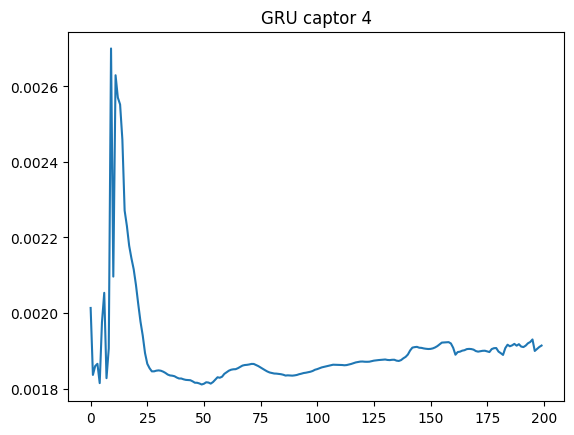

Epoch 1/200, Training Loss: 4.7851, Validation Loss: 0.0059
Epoch 2/200, Training Loss: 2.0749, Validation Loss: 0.0059
Epoch 3/200, Training Loss: 2.0489, Validation Loss: 0.0059
Epoch 4/200, Training Loss: 2.0143, Validation Loss: 0.0060
Epoch 5/200, Training Loss: 1.9710, Validation Loss: 0.0058
Epoch 6/200, Training Loss: 1.9277, Validation Loss: 0.0057
Epoch 7/200, Training Loss: 1.8895, Validation Loss: 0.0060
Epoch 8/200, Training Loss: 1.8647, Validation Loss: 0.0068
Epoch 9/200, Training Loss: 1.8393, Validation Loss: 0.0071
Epoch 10/200, Training Loss: 1.8251, Validation Loss: 0.0073
Epoch 11/200, Training Loss: 1.8156, Validation Loss: 0.0075
Epoch 12/200, Training Loss: 1.8032, Validation Loss: 0.0073
Epoch 13/200, Training Loss: 1.7859, Validation Loss: 0.0068
Epoch 14/200, Training Loss: 1.7722, Validation Loss: 0.0065
Epoch 15/200, Training Loss: 1.7622, Validation Loss: 0.0065
Epoch 16/200, Training Loss: 1.7542, Validation Loss: 0.0065
Epoch 17/200, Training Loss: 1.74

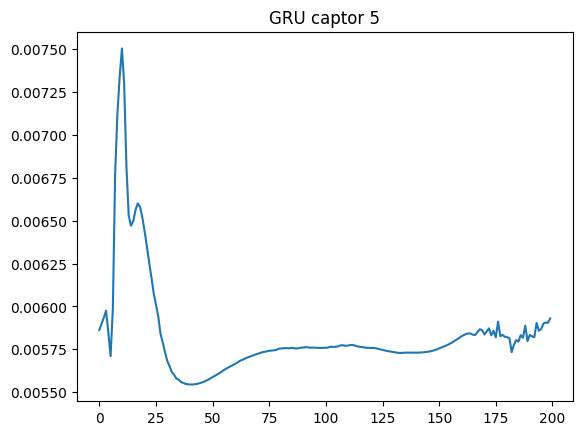

Epoch 1/200, Training Loss: 2.8929, Validation Loss: 0.0029
Epoch 2/200, Training Loss: 0.9757, Validation Loss: 0.0029
Epoch 3/200, Training Loss: 0.9670, Validation Loss: 0.0029
Epoch 4/200, Training Loss: 0.9550, Validation Loss: 0.0029
Epoch 5/200, Training Loss: 0.9411, Validation Loss: 0.0028
Epoch 6/200, Training Loss: 0.9259, Validation Loss: 0.0028
Epoch 7/200, Training Loss: 0.9102, Validation Loss: 0.0028
Epoch 8/200, Training Loss: 0.8953, Validation Loss: 0.0027
Epoch 9/200, Training Loss: 0.8802, Validation Loss: 0.0027
Epoch 10/200, Training Loss: 0.8646, Validation Loss: 0.0027
Epoch 11/200, Training Loss: 0.8526, Validation Loss: 0.0027
Epoch 12/200, Training Loss: 0.8468, Validation Loss: 0.0027
Epoch 13/200, Training Loss: 0.8394, Validation Loss: 0.0027
Epoch 14/200, Training Loss: 0.8304, Validation Loss: 0.0027
Epoch 15/200, Training Loss: 0.8236, Validation Loss: 0.0027
Epoch 16/200, Training Loss: 0.8203, Validation Loss: 0.0027
Epoch 17/200, Training Loss: 0.81

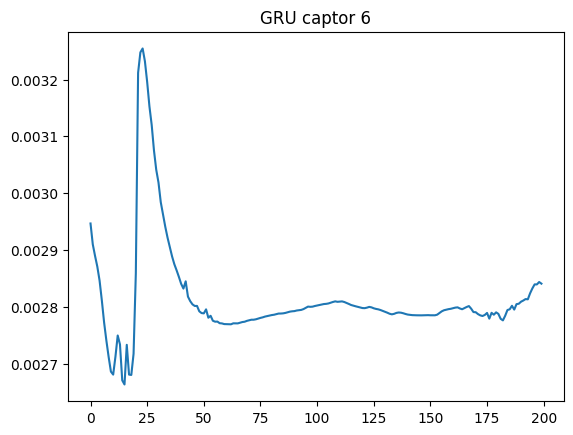

Epoch 1/200, Training Loss: 5.0546, Validation Loss: 0.0036
Epoch 2/200, Training Loss: 1.6852, Validation Loss: 0.0036
Epoch 3/200, Training Loss: 1.6652, Validation Loss: 0.0036
Epoch 4/200, Training Loss: 1.6400, Validation Loss: 0.0036
Epoch 5/200, Training Loss: 1.6176, Validation Loss: 0.0036
Epoch 6/200, Training Loss: 1.6848, Validation Loss: 0.0036
Epoch 7/200, Training Loss: 1.5332, Validation Loss: 0.0035
Epoch 8/200, Training Loss: 1.5926, Validation Loss: 0.0035
Epoch 9/200, Training Loss: 1.5360, Validation Loss: 0.0035
Epoch 10/200, Training Loss: 1.5111, Validation Loss: 0.0034
Epoch 11/200, Training Loss: 1.4916, Validation Loss: 0.0035
Epoch 12/200, Training Loss: 1.4653, Validation Loss: 0.0035
Epoch 13/200, Training Loss: 1.4469, Validation Loss: 0.0036
Epoch 14/200, Training Loss: 1.4339, Validation Loss: 0.0036
Epoch 15/200, Training Loss: 1.4230, Validation Loss: 0.0036
Epoch 16/200, Training Loss: 1.4208, Validation Loss: 0.0036
Epoch 17/200, Training Loss: 1.38

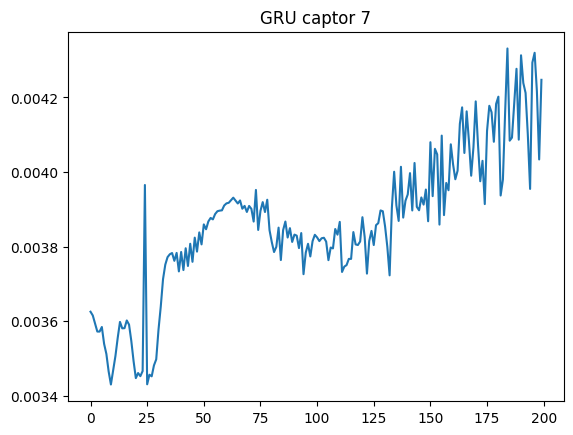

Epoch 1/200, Training Loss: 4.0838, Validation Loss: 0.0051
Epoch 2/200, Training Loss: 1.6878, Validation Loss: 0.0054
Epoch 3/200, Training Loss: 1.6697, Validation Loss: 0.0054
Epoch 4/200, Training Loss: 1.6419, Validation Loss: 0.0056
Epoch 5/200, Training Loss: 1.6087, Validation Loss: 0.0061
Epoch 6/200, Training Loss: 1.6102, Validation Loss: 0.0100
Epoch 7/200, Training Loss: 1.6541, Validation Loss: 0.0085
Epoch 8/200, Training Loss: 1.5545, Validation Loss: 0.0068
Epoch 9/200, Training Loss: 1.5174, Validation Loss: 0.0072
Epoch 10/200, Training Loss: 1.4854, Validation Loss: 0.0062
Epoch 11/200, Training Loss: 1.4601, Validation Loss: 0.0062
Epoch 12/200, Training Loss: 1.4480, Validation Loss: 0.0059
Epoch 13/200, Training Loss: 1.4373, Validation Loss: 0.0059
Epoch 14/200, Training Loss: 1.4265, Validation Loss: 0.0057
Epoch 15/200, Training Loss: 1.4110, Validation Loss: 0.0055
Epoch 16/200, Training Loss: 1.3968, Validation Loss: 0.0054
Epoch 17/200, Training Loss: 1.38

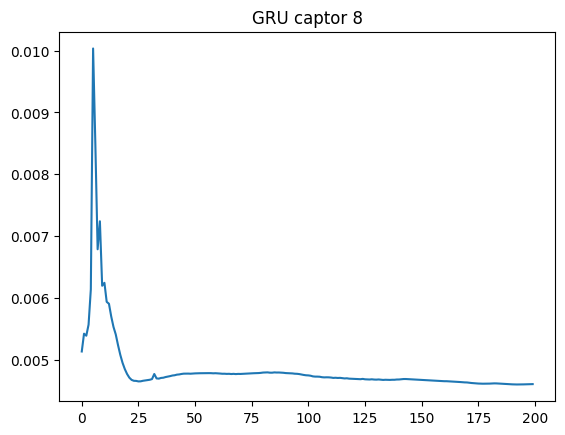

Epoch 1/200, Training Loss: 6.1492, Validation Loss: 0.0072
Epoch 2/200, Training Loss: 2.6030, Validation Loss: 0.0070
Epoch 3/200, Training Loss: 2.5775, Validation Loss: 0.0071
Epoch 4/200, Training Loss: 2.5475, Validation Loss: 0.0073
Epoch 5/200, Training Loss: 2.5171, Validation Loss: 0.0076
Epoch 6/200, Training Loss: 2.4876, Validation Loss: 0.0080
Epoch 7/200, Training Loss: 2.4568, Validation Loss: 0.0080
Epoch 8/200, Training Loss: 2.4216, Validation Loss: 0.0079
Epoch 9/200, Training Loss: 2.3870, Validation Loss: 0.0079
Epoch 10/200, Training Loss: 2.3536, Validation Loss: 0.0075
Epoch 11/200, Training Loss: 2.3144, Validation Loss: 0.0069
Epoch 12/200, Training Loss: 2.2778, Validation Loss: 0.0064
Epoch 13/200, Training Loss: 2.2450, Validation Loss: 0.0066
Epoch 14/200, Training Loss: 2.2461, Validation Loss: 0.0068
Epoch 15/200, Training Loss: 2.2318, Validation Loss: 0.0068
Epoch 16/200, Training Loss: 2.2170, Validation Loss: 0.0069
Epoch 17/200, Training Loss: 2.20

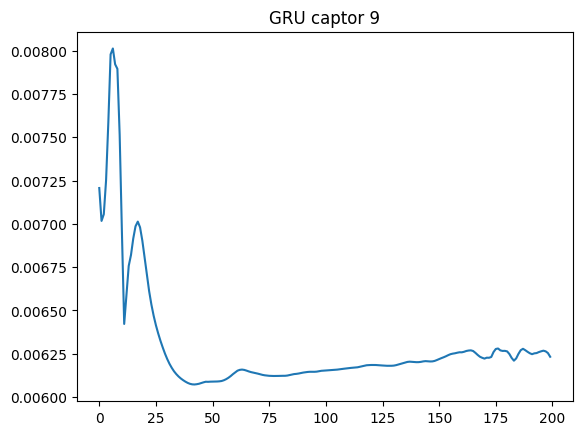

Epoch 1/200, Training Loss: 6.4929, Validation Loss: 0.0062
Epoch 2/200, Training Loss: 2.5485, Validation Loss: 0.0063
Epoch 3/200, Training Loss: 2.5347, Validation Loss: 0.0064
Epoch 4/200, Training Loss: 2.5148, Validation Loss: 0.0065
Epoch 5/200, Training Loss: 2.4881, Validation Loss: 0.0066
Epoch 6/200, Training Loss: 2.4552, Validation Loss: 0.0067
Epoch 7/200, Training Loss: 2.4173, Validation Loss: 0.0067
Epoch 8/200, Training Loss: 2.3741, Validation Loss: 0.0066
Epoch 9/200, Training Loss: 2.3235, Validation Loss: 0.0063
Epoch 10/200, Training Loss: 2.2706, Validation Loss: 0.0063
Epoch 11/200, Training Loss: 2.2185, Validation Loss: 0.0062
Epoch 12/200, Training Loss: 2.2175, Validation Loss: 0.0061
Epoch 13/200, Training Loss: 2.3139, Validation Loss: 0.0066
Epoch 14/200, Training Loss: 2.2512, Validation Loss: 0.0064
Epoch 15/200, Training Loss: 2.1905, Validation Loss: 0.0065
Epoch 16/200, Training Loss: 2.1708, Validation Loss: 0.0063
Epoch 17/200, Training Loss: 2.11

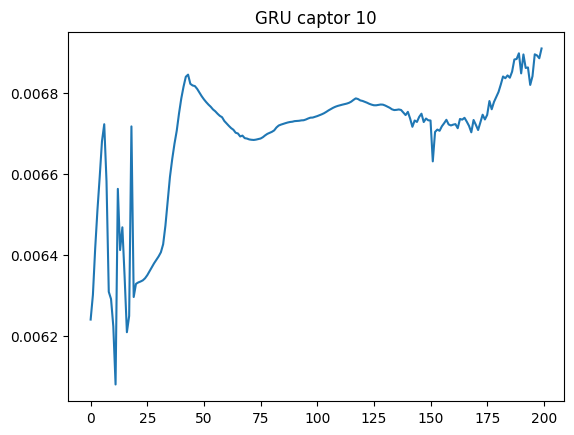

Epoch 1/200, Training Loss: 5.0304, Validation Loss: 0.0074
Epoch 2/200, Training Loss: 2.2733, Validation Loss: 0.0087
Epoch 3/200, Training Loss: 2.3127, Validation Loss: 0.0101
Epoch 4/200, Training Loss: 2.2725, Validation Loss: 0.0117
Epoch 5/200, Training Loss: 2.2982, Validation Loss: 0.0102
Epoch 6/200, Training Loss: 2.2549, Validation Loss: 0.0088
Epoch 7/200, Training Loss: 2.2002, Validation Loss: 0.0081
Epoch 8/200, Training Loss: 2.1568, Validation Loss: 0.0077
Epoch 9/200, Training Loss: 2.1185, Validation Loss: 0.0073
Epoch 10/200, Training Loss: 2.0853, Validation Loss: 0.0071
Epoch 11/200, Training Loss: 2.0576, Validation Loss: 0.0069
Epoch 12/200, Training Loss: 2.0359, Validation Loss: 0.0068
Epoch 13/200, Training Loss: 2.0190, Validation Loss: 0.0068
Epoch 14/200, Training Loss: 2.0061, Validation Loss: 0.0067
Epoch 15/200, Training Loss: 1.9976, Validation Loss: 0.0066
Epoch 16/200, Training Loss: 1.9877, Validation Loss: 0.0066
Epoch 17/200, Training Loss: 1.97

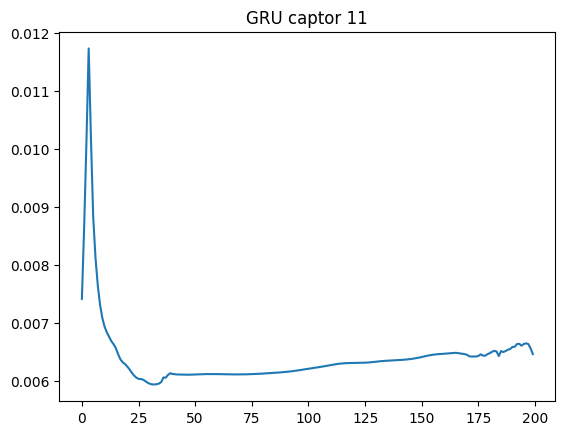

Epoch 1/200, Training Loss: 8.6422, Validation Loss: 0.0089
Epoch 2/200, Training Loss: 4.5219, Validation Loss: 0.0089
Epoch 3/200, Training Loss: 4.4809, Validation Loss: 0.0087
Epoch 4/200, Training Loss: 4.4523, Validation Loss: 0.0085
Epoch 5/200, Training Loss: 4.4274, Validation Loss: 0.0083
Epoch 6/200, Training Loss: 4.4024, Validation Loss: 0.0080
Epoch 7/200, Training Loss: 4.3762, Validation Loss: 0.0079
Epoch 8/200, Training Loss: 4.3502, Validation Loss: 0.0078
Epoch 9/200, Training Loss: 4.3236, Validation Loss: 0.0077
Epoch 10/200, Training Loss: 4.2967, Validation Loss: 0.0076
Epoch 11/200, Training Loss: 4.2714, Validation Loss: 0.0076
Epoch 12/200, Training Loss: 4.2479, Validation Loss: 0.0075
Epoch 13/200, Training Loss: 4.2272, Validation Loss: 0.0075
Epoch 14/200, Training Loss: 4.2075, Validation Loss: 0.0075
Epoch 15/200, Training Loss: 4.1924, Validation Loss: 0.0075
Epoch 16/200, Training Loss: 4.1772, Validation Loss: 0.0075
Epoch 17/200, Training Loss: 4.16

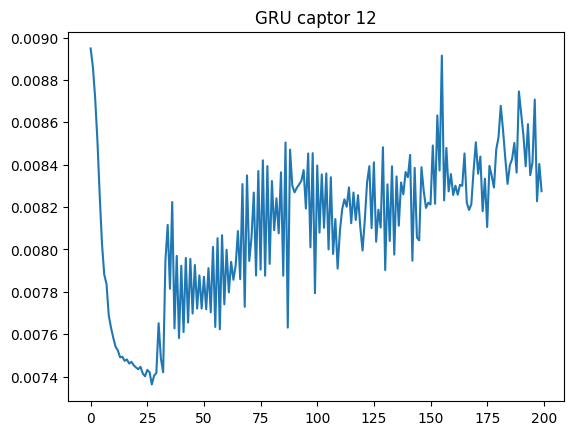

Epoch 1/200, Training Loss: 7.9185, Validation Loss: 0.0078
Epoch 2/200, Training Loss: 2.9431, Validation Loss: 0.0079
Epoch 3/200, Training Loss: 2.9211, Validation Loss: 0.0079
Epoch 4/200, Training Loss: 2.8850, Validation Loss: 0.0078
Epoch 5/200, Training Loss: 2.8416, Validation Loss: 0.0078
Epoch 6/200, Training Loss: 2.7938, Validation Loss: 0.0077
Epoch 7/200, Training Loss: 2.7456, Validation Loss: 0.0076
Epoch 8/200, Training Loss: 2.7045, Validation Loss: 0.0075
Epoch 9/200, Training Loss: 2.6799, Validation Loss: 0.0074
Epoch 10/200, Training Loss: 2.6963, Validation Loss: 0.0072
Epoch 11/200, Training Loss: 2.9337, Validation Loss: 0.0071
Epoch 12/200, Training Loss: 2.6131, Validation Loss: 0.0071
Epoch 13/200, Training Loss: 2.6591, Validation Loss: 0.0071
Epoch 14/200, Training Loss: 2.5927, Validation Loss: 0.0070
Epoch 15/200, Training Loss: 2.5580, Validation Loss: 0.0072
Epoch 16/200, Training Loss: 2.5248, Validation Loss: 0.0072
Epoch 17/200, Training Loss: 2.50

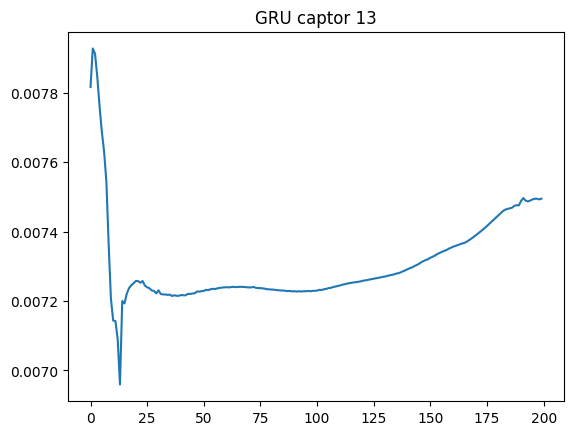

Epoch 1/200, Training Loss: 5.8241, Validation Loss: 0.0058
Epoch 2/200, Training Loss: 2.0862, Validation Loss: 0.0058
Epoch 3/200, Training Loss: 2.0680, Validation Loss: 0.0058
Epoch 4/200, Training Loss: 2.0472, Validation Loss: 0.0058
Epoch 5/200, Training Loss: 2.0254, Validation Loss: 0.0058
Epoch 6/200, Training Loss: 2.0170, Validation Loss: 0.0053
Epoch 7/200, Training Loss: 2.0127, Validation Loss: 0.0056
Epoch 8/200, Training Loss: 2.1923, Validation Loss: 0.0055
Epoch 9/200, Training Loss: 1.9827, Validation Loss: 0.0054
Epoch 10/200, Training Loss: 1.9331, Validation Loss: 0.0053
Epoch 11/200, Training Loss: 1.8837, Validation Loss: 0.0052
Epoch 12/200, Training Loss: 1.8514, Validation Loss: 0.0052
Epoch 13/200, Training Loss: 1.8192, Validation Loss: 0.0051
Epoch 14/200, Training Loss: 1.7968, Validation Loss: 0.0051
Epoch 15/200, Training Loss: 1.7780, Validation Loss: 0.0051
Epoch 16/200, Training Loss: 1.7610, Validation Loss: 0.0052
Epoch 17/200, Training Loss: 1.74

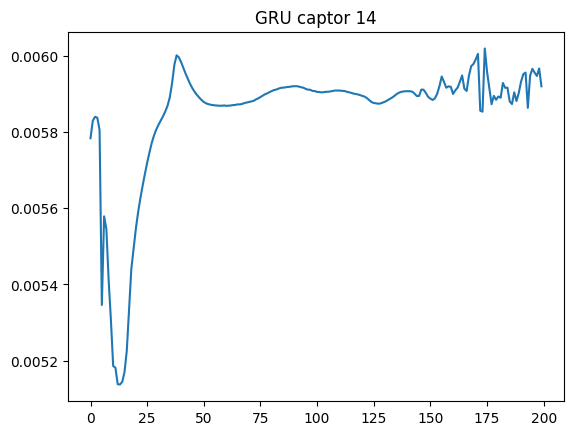

Epoch 1/200, Training Loss: 9.2903, Validation Loss: 0.0105
Epoch 2/200, Training Loss: 4.3408, Validation Loss: 0.0108
Epoch 3/200, Training Loss: 4.2934, Validation Loss: 0.0106
Epoch 4/200, Training Loss: 4.2388, Validation Loss: 0.0101
Epoch 5/200, Training Loss: 4.2038, Validation Loss: 0.0100
Epoch 6/200, Training Loss: 4.3641, Validation Loss: 0.0099
Epoch 7/200, Training Loss: 4.0973, Validation Loss: 0.0099
Epoch 8/200, Training Loss: 3.9760, Validation Loss: 0.0098
Epoch 9/200, Training Loss: 3.8950, Validation Loss: 0.0097
Epoch 10/200, Training Loss: 3.8565, Validation Loss: 0.0098
Epoch 11/200, Training Loss: 3.8200, Validation Loss: 0.0100
Epoch 12/200, Training Loss: 3.7971, Validation Loss: 0.0104
Epoch 13/200, Training Loss: 3.7888, Validation Loss: 0.0110
Epoch 14/200, Training Loss: 3.7742, Validation Loss: 0.0111
Epoch 15/200, Training Loss: 3.6466, Validation Loss: 0.0106
Epoch 16/200, Training Loss: 3.5806, Validation Loss: 0.0104
Epoch 17/200, Training Loss: 3.55

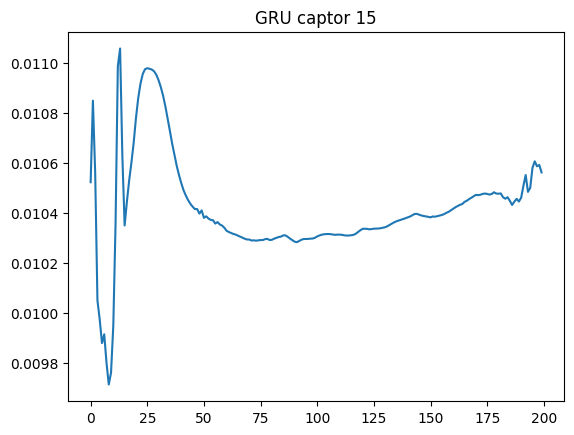

In [27]:
num_epochs_GRU = 200

for i in range(n_neighbors+1):
    _, valid_losses = train_model(models_univaritate_GRU[f"GRUModel {i}"]["model"], 
                models_univaritate_GRU[f"GRUModel {i}"]["train_loader"], 
                models_univaritate_GRU[f"GRUModel {i}"]["val_loader"], 
                f"./{normalization}/nb_captor_{n_neighbors+1}/epoch_{num_epochs_GRU}/univariate_GRU_model_{i}.pkl", num_epochs=num_epochs_GRU, remove=False)
    plt.title(f"GRU captor {i}")
    plt.plot(valid_losses, label="valid_losses")
    plt.legend
    plt.show()

## Results Multivariate vs Univariate (TGCN VS LSTM - GRU)

In [28]:
def result_prediction(predictions, actuals):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    import numpy as np
    
    indices_by_month = []
    EPSILON = 1e-5
    # Créer une liste vide pour stocker les données du tableau
    data = []
    y_pred = predictions[:]
    y_true = actuals[:]

    signe = "-" if np.mean(y_pred - y_true) < 0 else "+"
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)*100
    if (mape > 1 or mape < 0):
        mape = "ERROR"
    smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))*100
    maape =  np.mean(np.arctan(np.abs((y_true - y_pred) / (y_true + EPSILON))))*100
    
    return [signe, mae, rmse, mape, smape, maape]

In [29]:
def highlight_col(col, min_val):
    if col.name == "SMAPE":
        color = ['green' if val <= min_val else 'red' for val in col]
        return [f'background-color: {c}' for c in color]
    else :
        return ['' for _ in range(len(col))]


In [30]:
def highlight_rows(row, min_val):
    color = 'green' if row['SMAPE'] == min_val else 'red'
    return [f'background-color: {color}'] * len(row)

In [31]:
######################################################################
# Divide by max
######################################################################
def test_model_divide_by_max(best_model, test_loader, maximum):
    import numpy as np
    
    # Load the best model and evaluate on the test set
    best_model.double()
    best_model.eval()
    criterion = torch.nn.MSELoss()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    best_model.to(device)

    # Evaluate the model on the test set
    test_loss = 0.0
    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = (inputs).to(device)
            targets = (targets).squeeze().to(device)
            outputs = best_model(inputs).squeeze()
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            # Save the predictions and actual values for plotting later
            predictions.append(outputs.cpu().numpy())
            actuals.append(targets.cpu().numpy())
    test_loss /= len(test_loader)
    # print(f"Test Loss: {test_loss:.4f}")
    
    # Concatenate the predictions and actuals
    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)

    return (predictions*maximum, actuals*maximum)

In [32]:
######################################################################
# Center_reduce
######################################################################
def test_model_center_reduce(best_model, test_loader, meanstd_dict):
    import numpy as np
    
    # Load the best model and evaluate on the test set
    best_model.double()
    best_model.eval()
    criterion = torch.nn.MSELoss()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    best_model.to(device)

    # Evaluate the model on the test set
    test_loss = 0.0
    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(device)
            targets = targets.squeeze().to(device)
            outputs = best_model(inputs).squeeze()
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            # Save the predictions and actual values for plotting later
            predictions.append(outputs.cpu().numpy())
            actuals.append(targets.cpu().numpy())
    test_loss /= len(test_loader)
    print(f"Test Loss: {test_loss:.4f}")
    # Concatenate the predictions and actuals
    predictions = np.concatenate((predictions*meanstd_dict["std"]) + meanstd_dict["mean"], axis=0)
    actuals = np.concatenate((actuals*meanstd_dict["std"]) + meanstd_dict["mean"], axis=0)

    return (predictions, actuals)

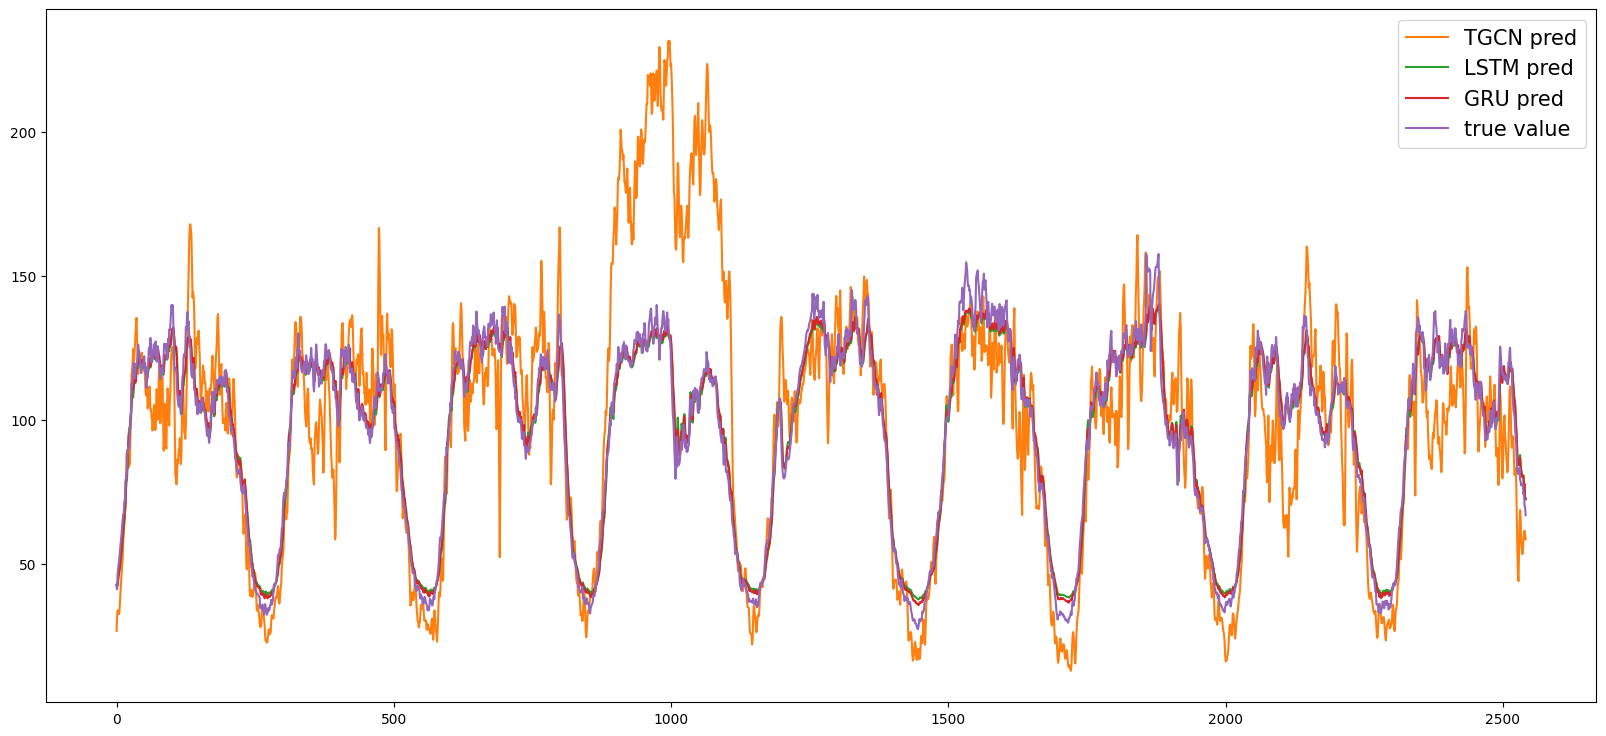

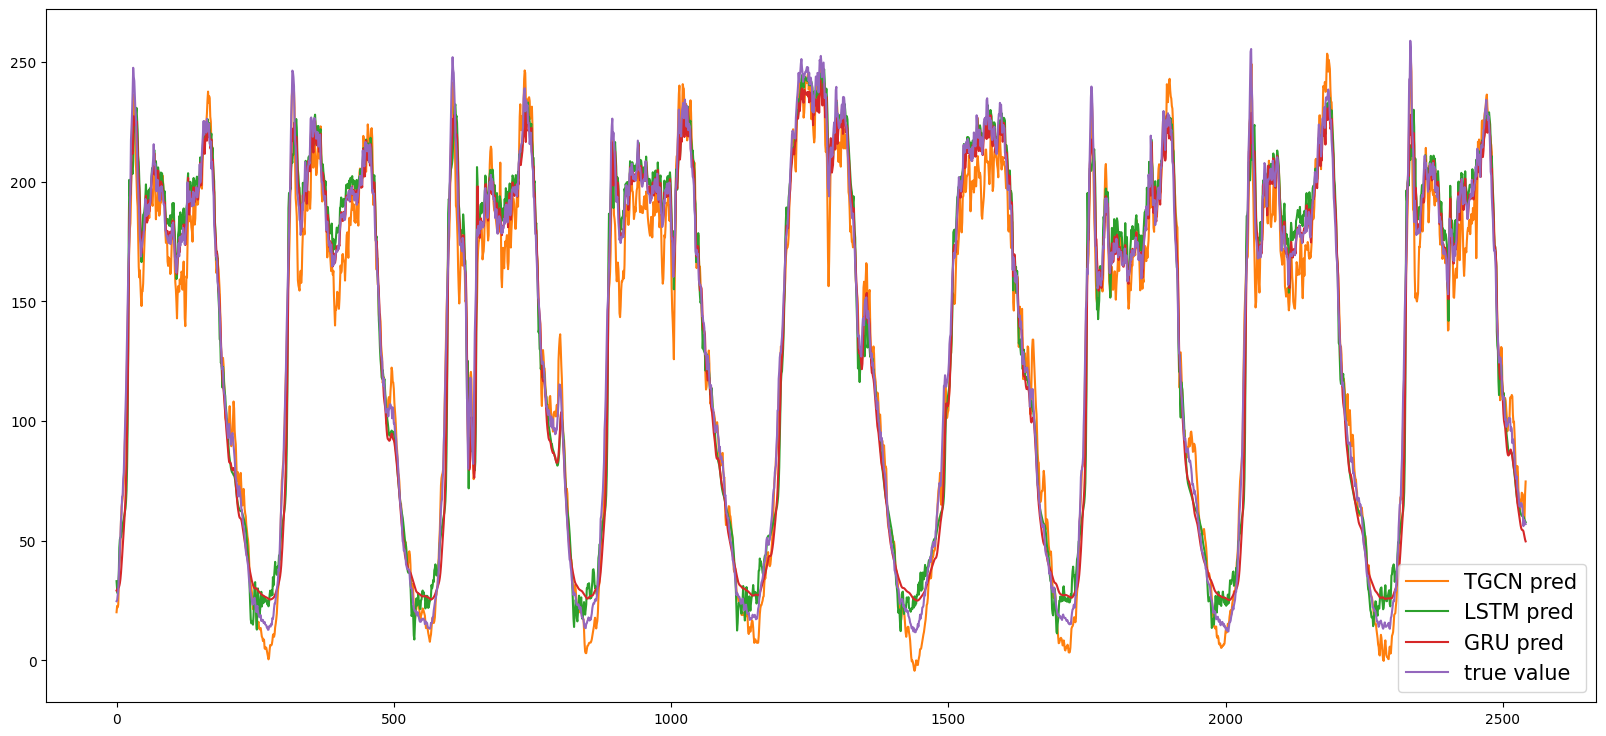

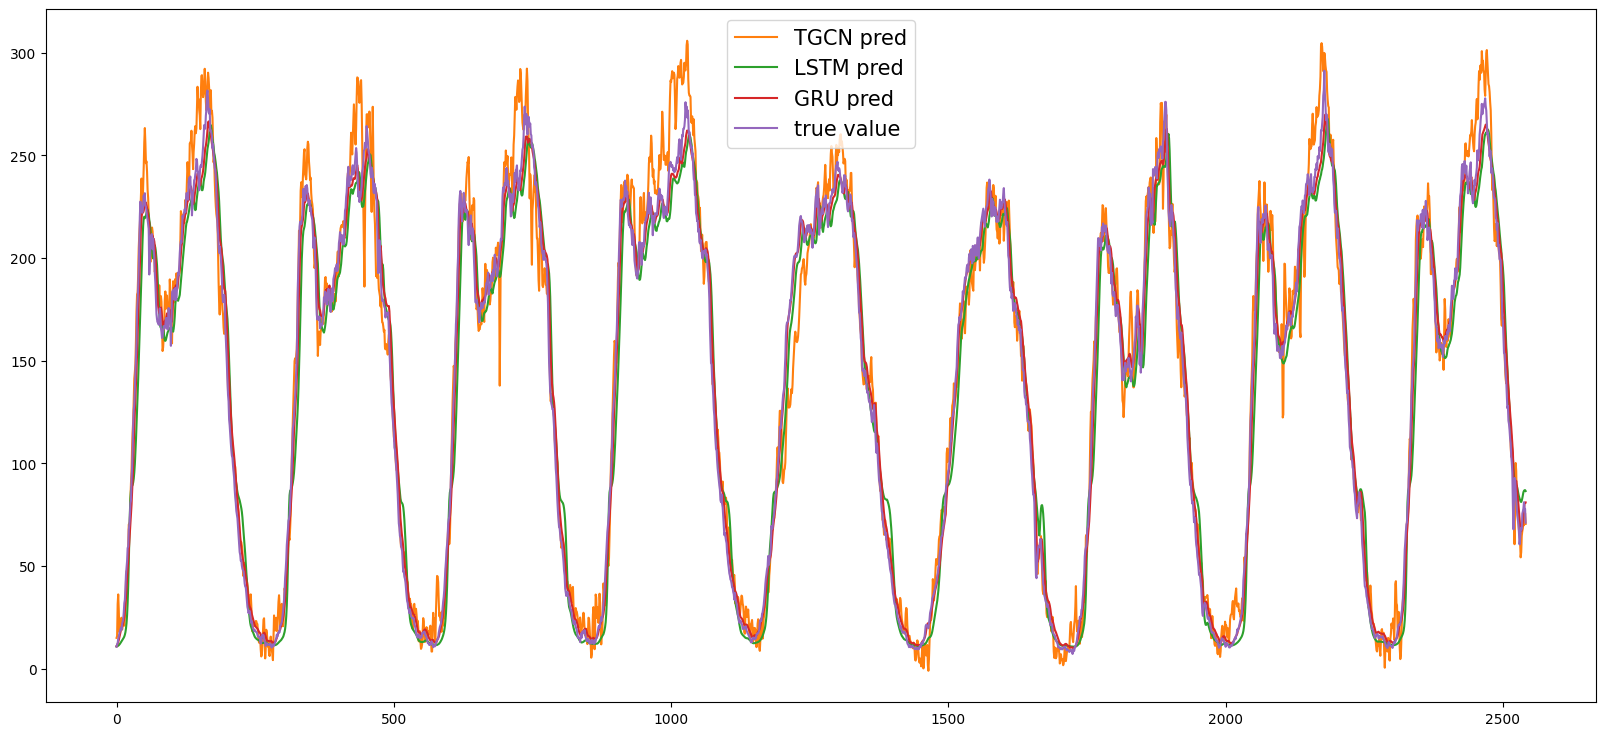

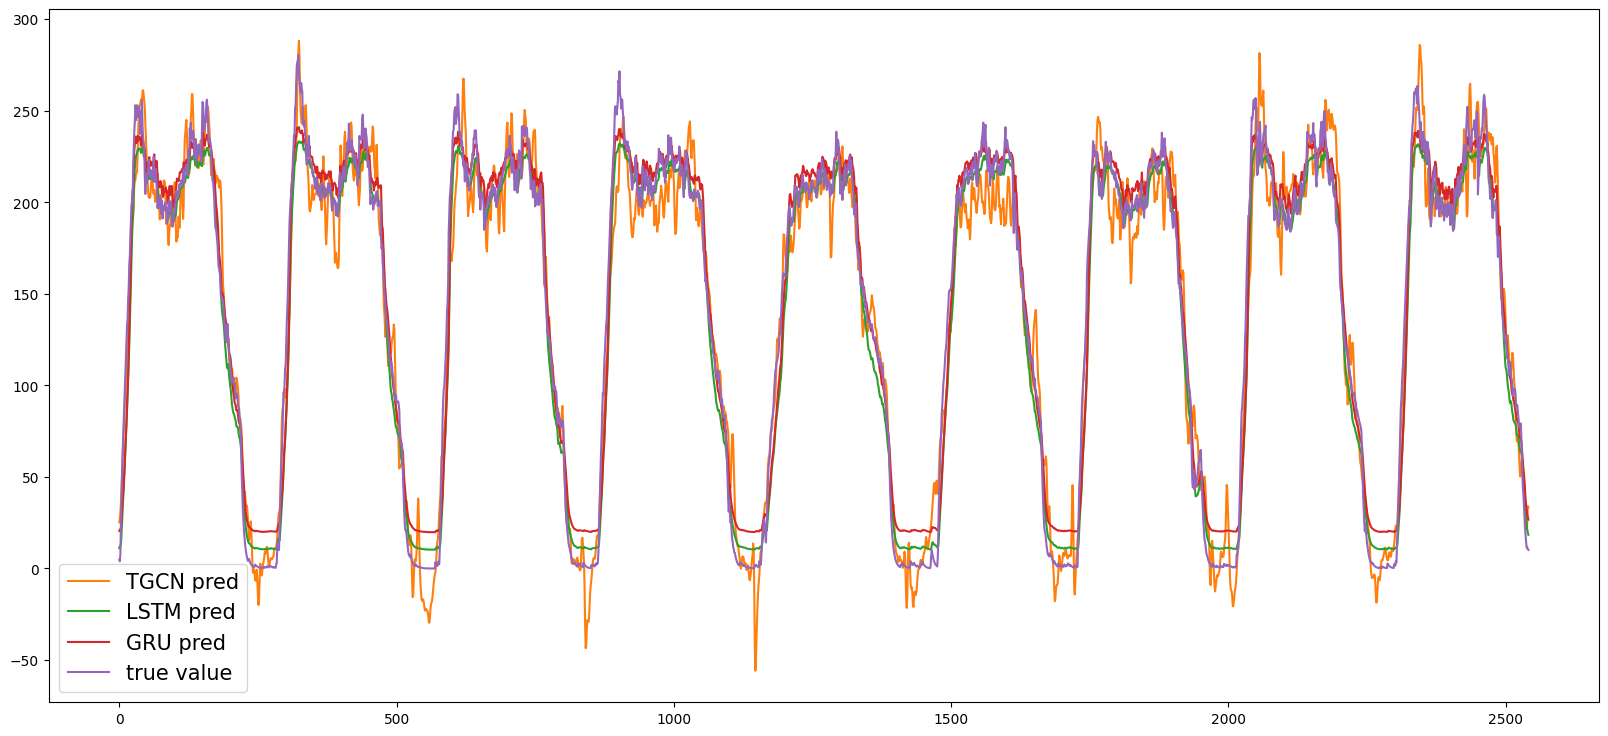

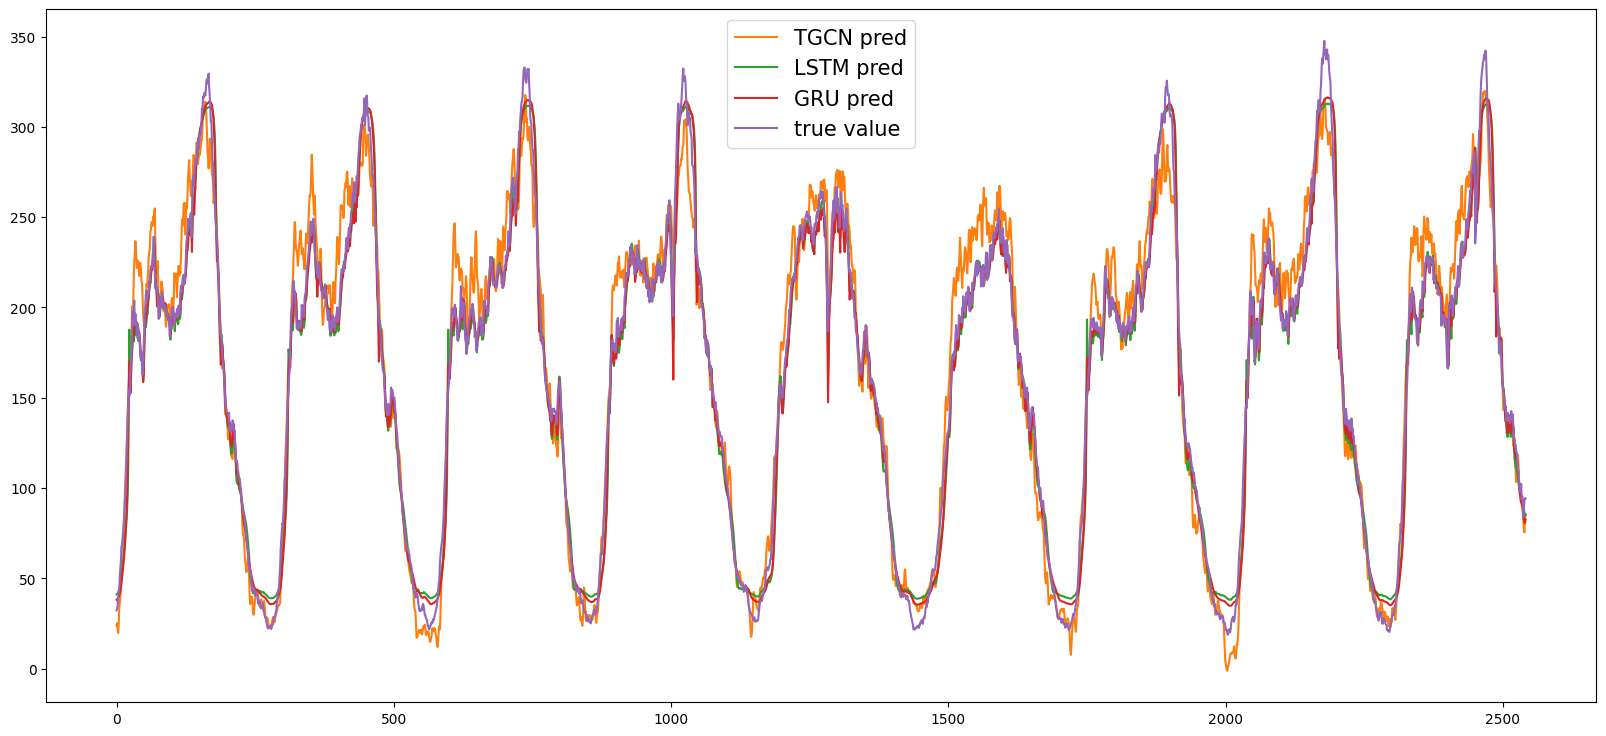

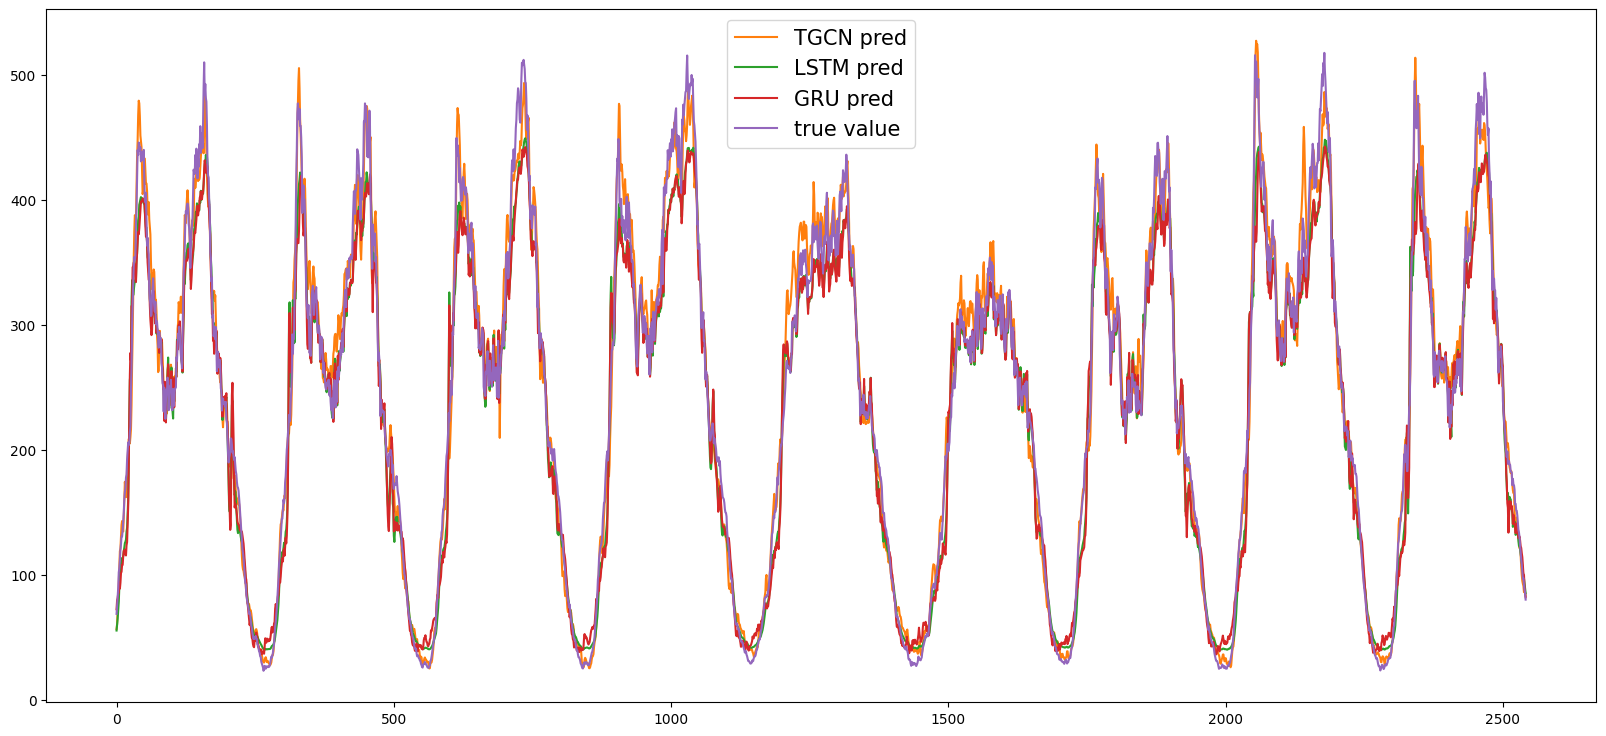

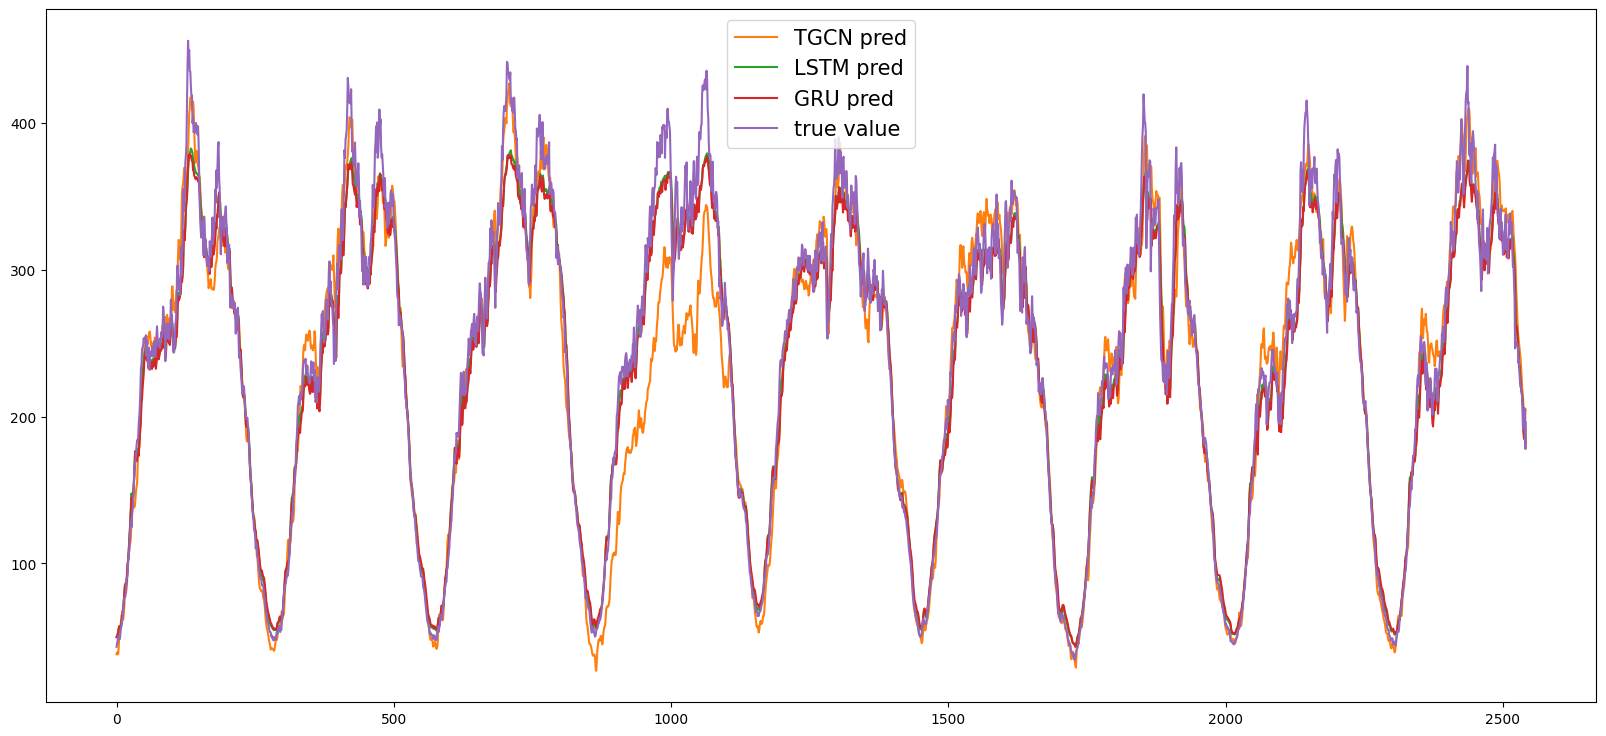

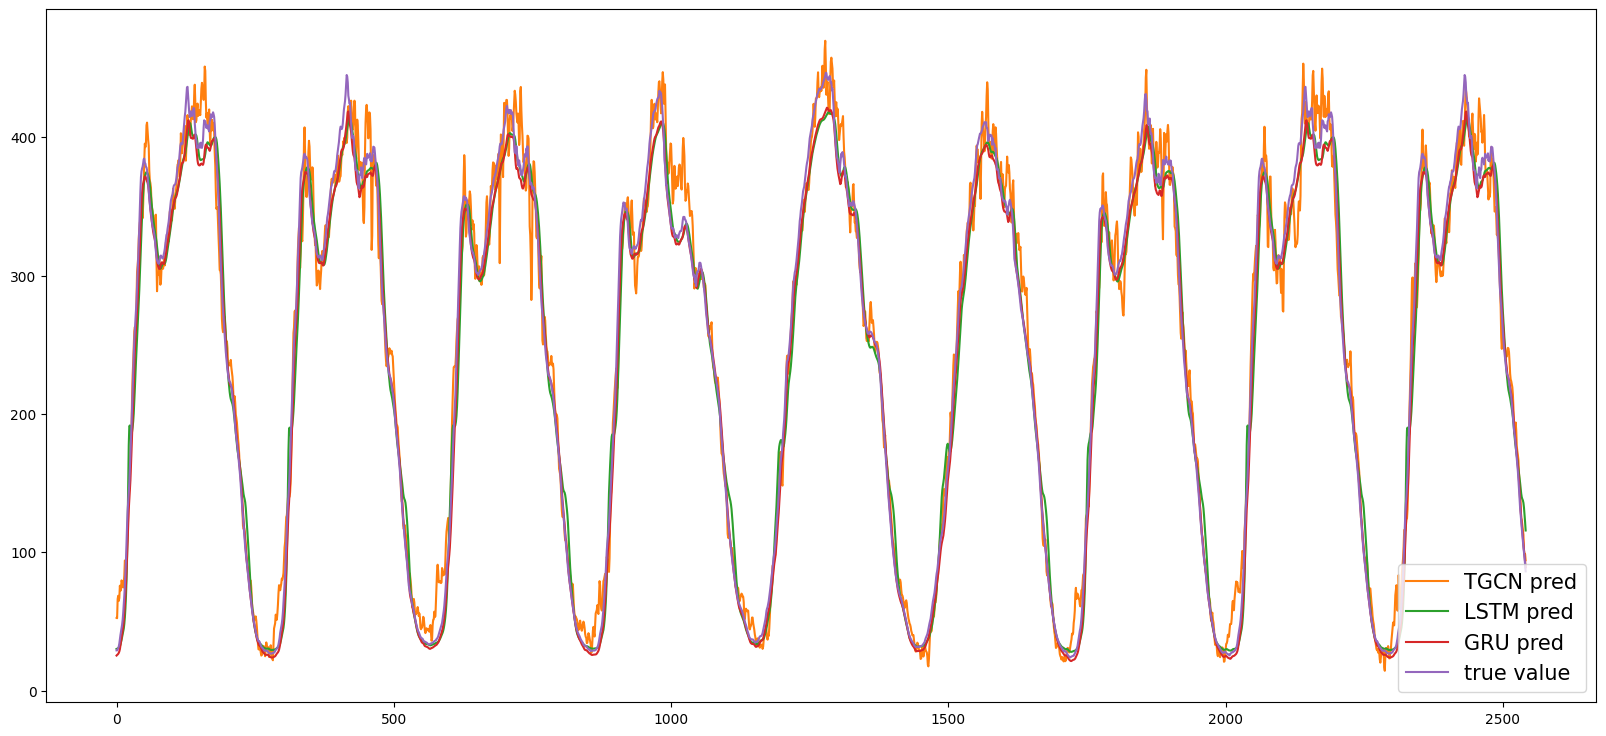

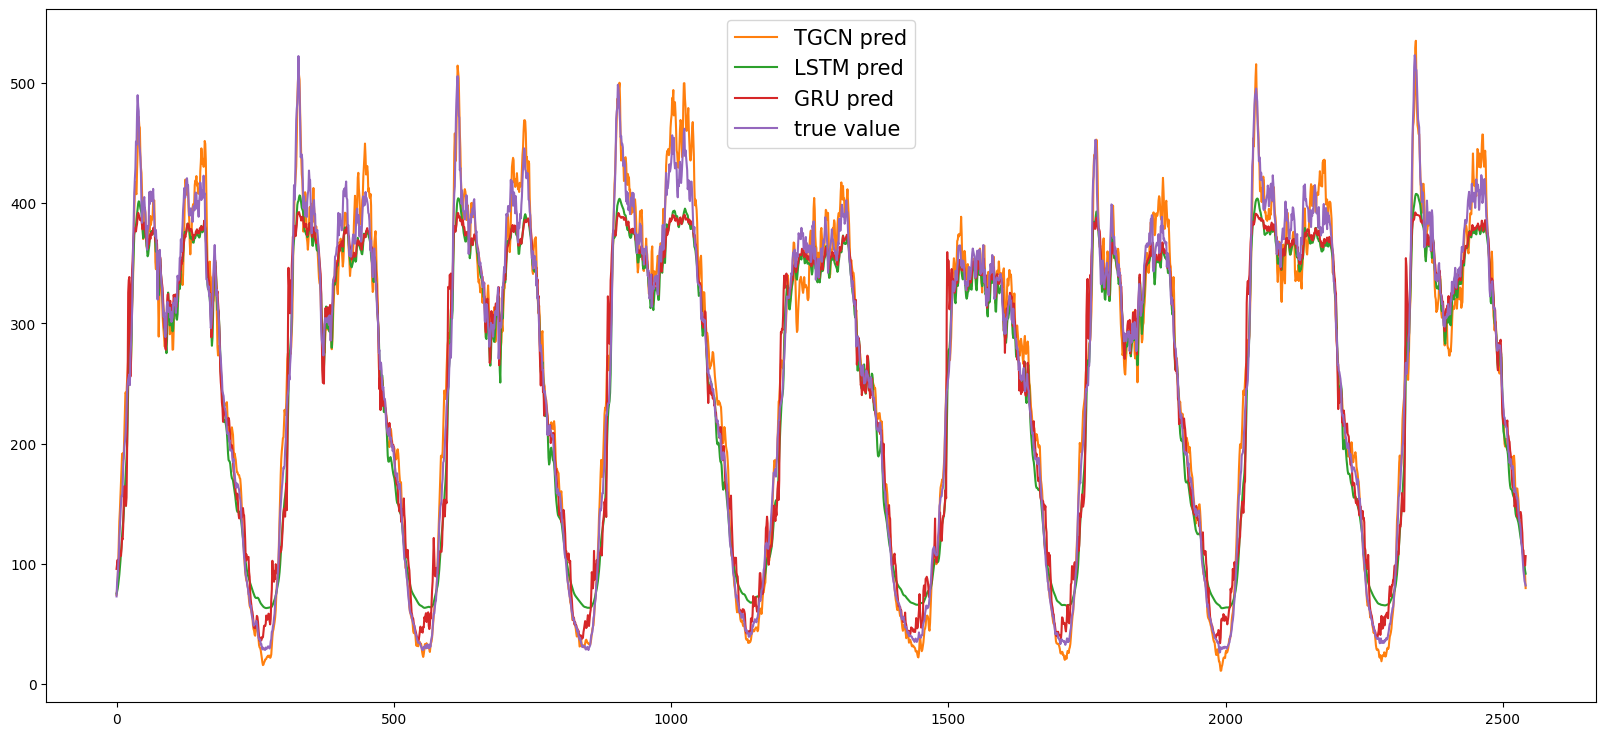

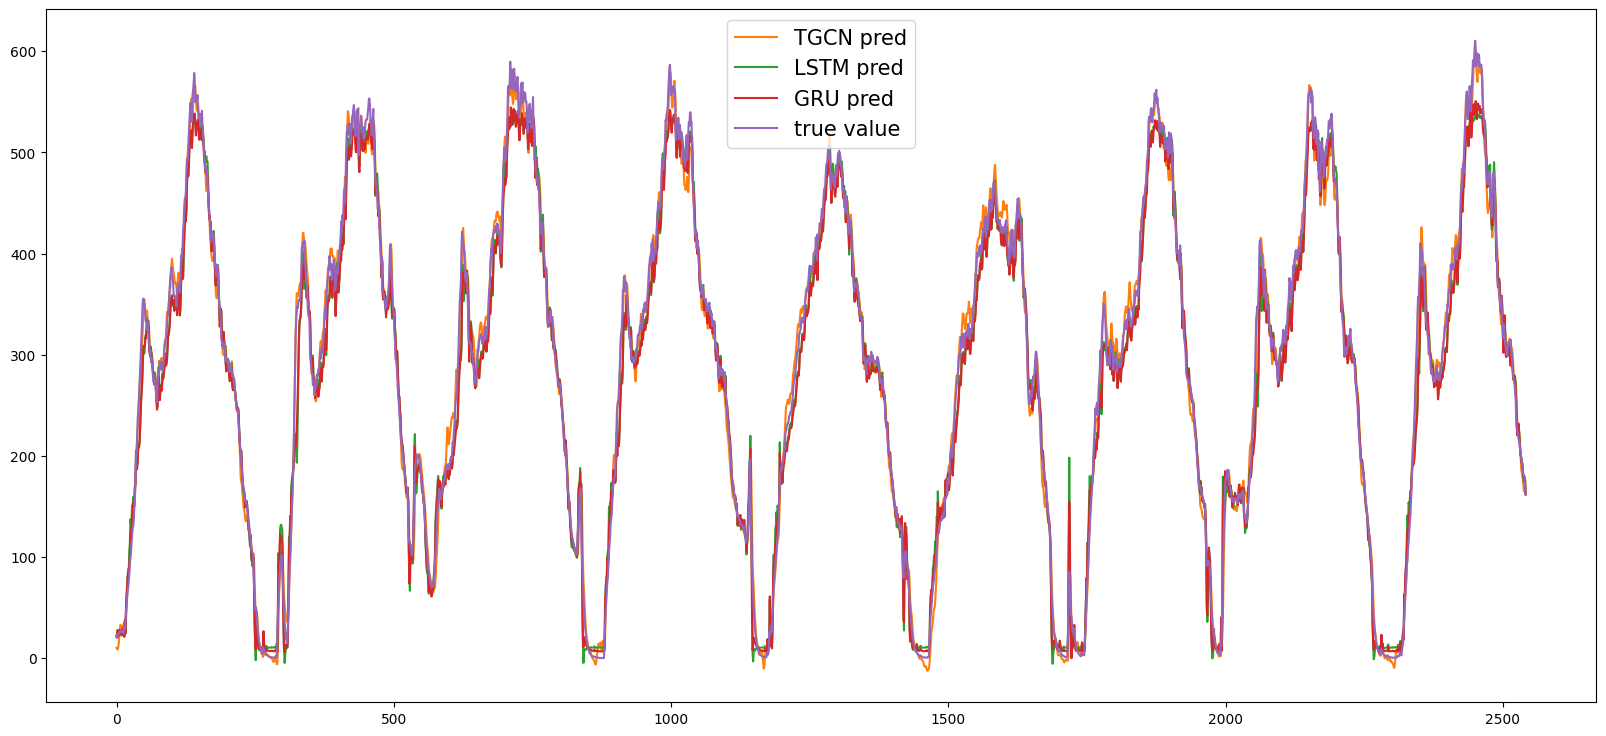

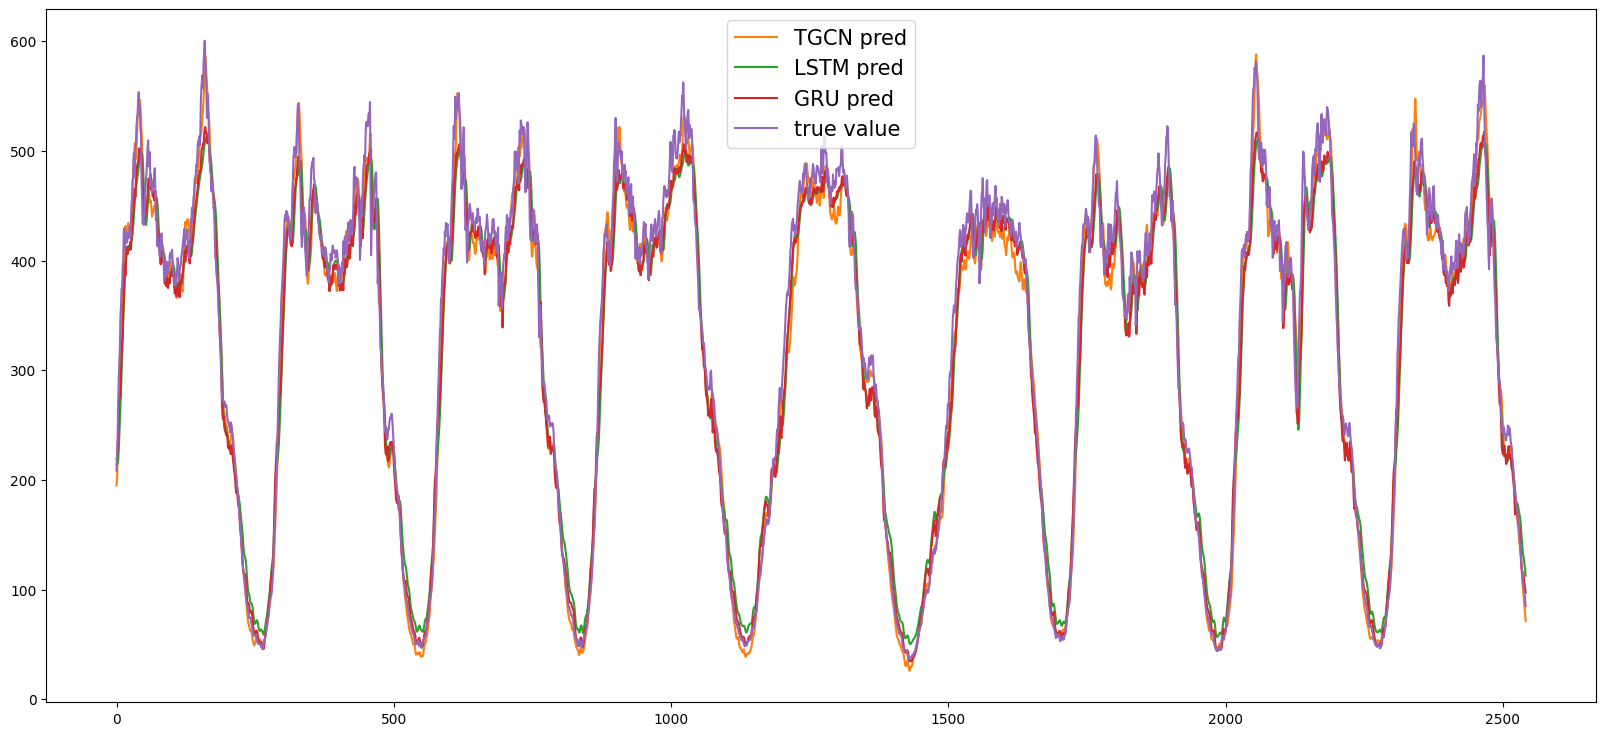

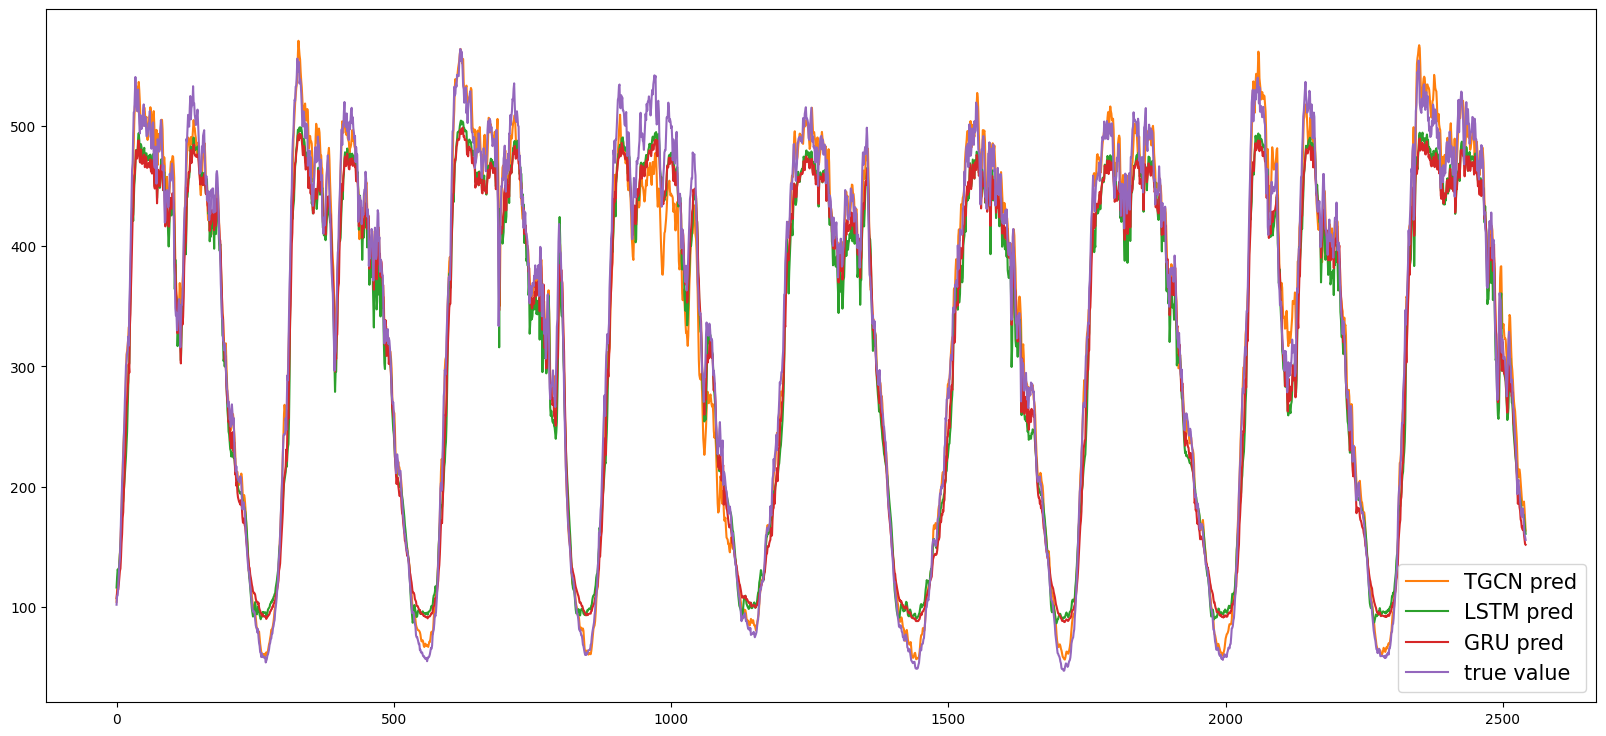

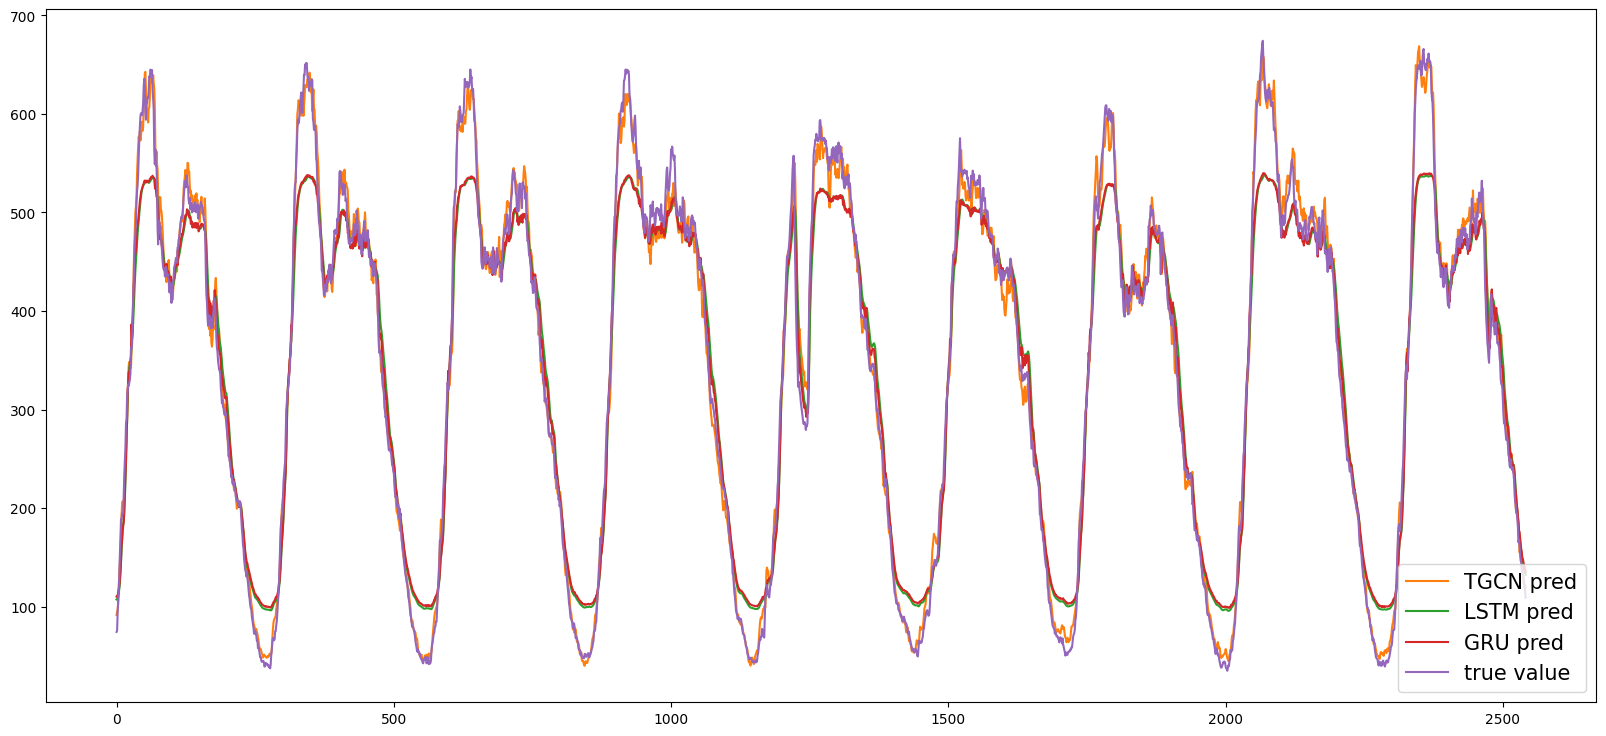

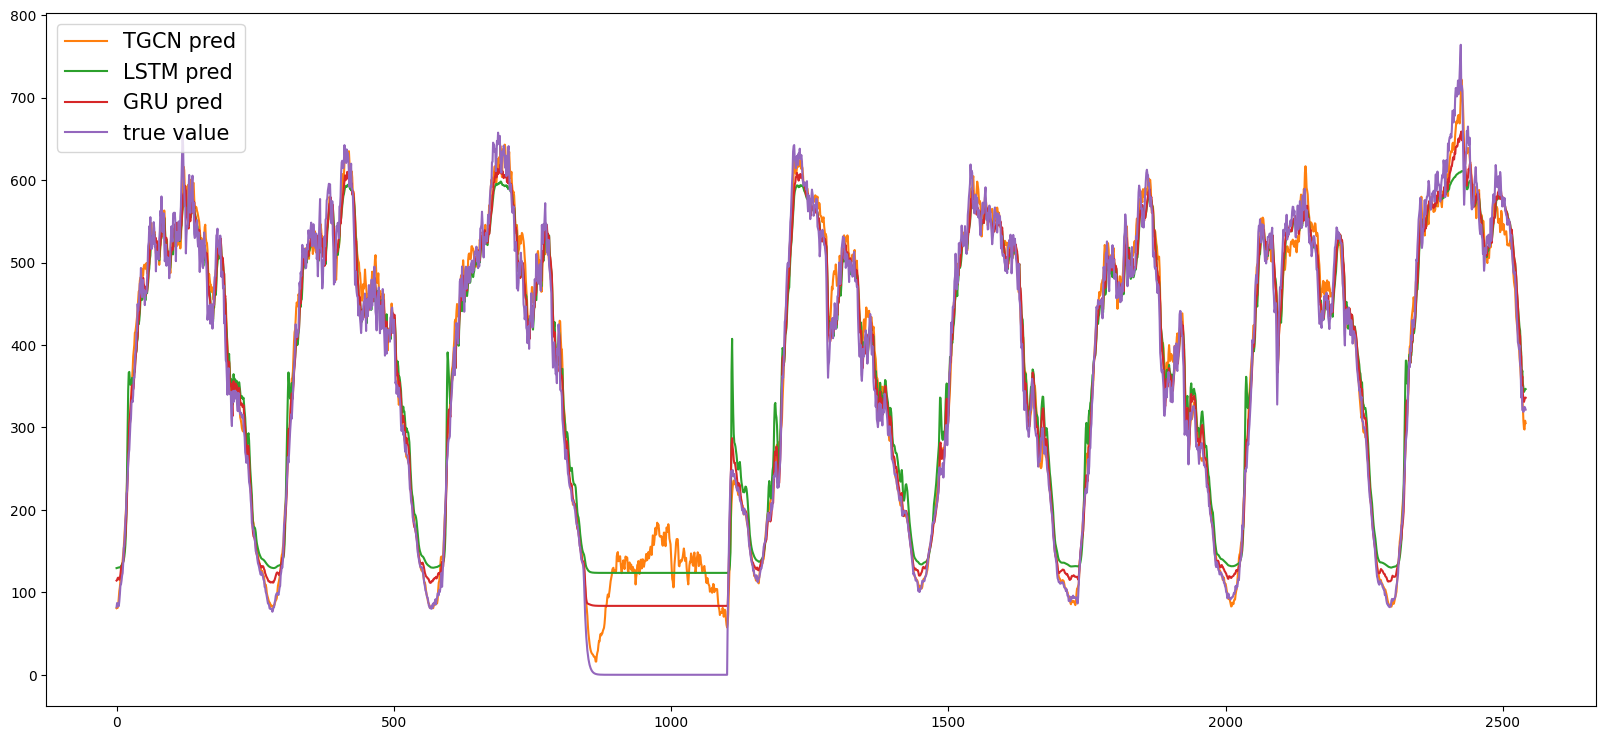

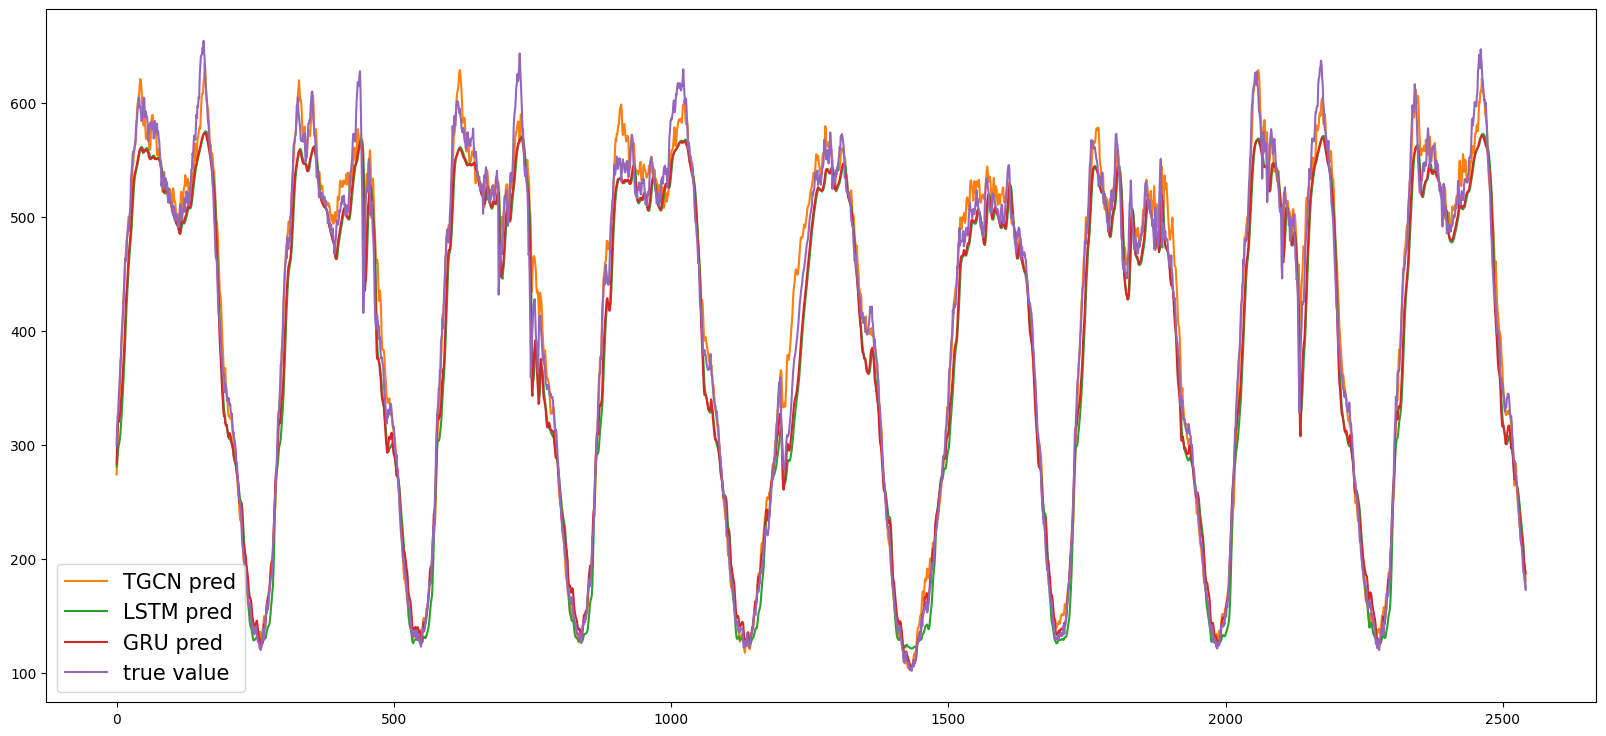

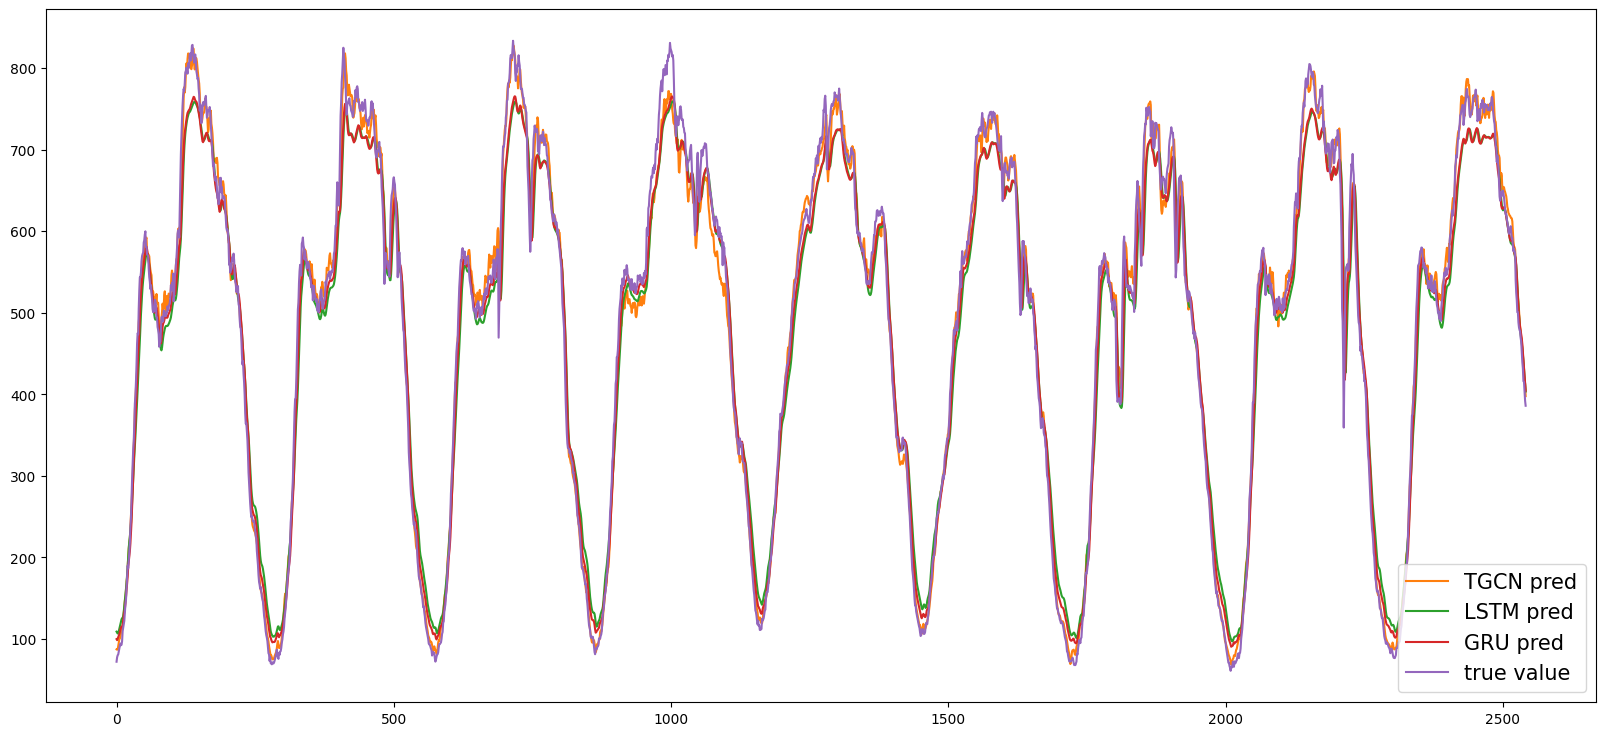

In [35]:
import matplotlib.pyplot as plt

######################################################################
# TGCN
######################################################################
# load best model
model_TGCN.load_state_dict(torch.load(f"./{normalization}/nb_captor_{n_neighbors+1}/epoch_{num_epochs_TGCN}/TGCN_model.pkl".format(input)))

# Make predictions
predictions_TGCN, actuals_TGCN = test_model_divide_by_max(model_TGCN, test_loader_TGCN, maximum)


for i in range(n_neighbors+1):
    
    # Save result for each captor
    temp = result_prediction(predictions_TGCN[:, i], actuals_TGCN[:, i])
    temp.append(f"TGCN Model captor {i}")
    data = [temp]


######################################################################
# LSTM
######################################################################
    # load best model
    models_univaritate_LSTM[f"LSTMModel {i}"]["model"].load_state_dict(torch.load(f"./{normalization}/nb_captor_{n_neighbors+1}/epoch_{num_epochs_LSTM}/univariate_LSTM_model_{i}.pkl".format(input)))
    
    # Make predictions
    predictions_LSTM, actuals_LSTM = test_model_divide_by_max(models_univaritate_LSTM[f"LSTMModel {i}"]["model"], 
                                    models_univaritate_LSTM[f"LSTMModel {i}"]["test_loader"], 
                                    maximum)
    
    # Save result
    temp = result_prediction(predictions_LSTM, actuals_LSTM)

    temp.append(f"LSTM Model captor {i}")
    data.append(temp)


######################################################################
# GRU
######################################################################
    # Load best model
    models_univaritate_GRU[f"GRUModel {i}"]["model"].load_state_dict(torch.load(f"./{normalization}/nb_captor_{n_neighbors+1}/epoch_{num_epochs_GRU}/univariate_GRU_model_{i}.pkl".format(input)))
    predictions_GRU, actuals_GRU = test_model_divide_by_max(models_univaritate_GRU[f"GRUModel {i}"]["model"], 
                                    models_univaritate_GRU[f"GRUModel {i}"]["test_loader"],
                                    maximum)
    
    # Make predictions
    temp = result_prediction(predictions_GRU, actuals_GRU)

    # Save results
    temp.append(f"GRU Model captor {i}")
    data.append(temp)


######################################################################
# Dataframe
######################################################################

    df = pd.DataFrame(data, columns=['Signe error', 'MAE', 'RMSE', 'MAPE', 'SMAPE', 'MAAPE', "Captor"])

    # Définir le mois comme index du DataFrame
    df.set_index('Captor', inplace=True)

    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', None)

    min_val = df['SMAPE'].min()
    #df = df.style.apply(highlight_col, axis=0, min_val=min_val)
    df = df.style.apply(highlight_rows, axis=1, min_val=min_val)
    display(df)


######################################################################
# Plots
######################################################################

    plt.figure(figsize=(20, 9))
    plt.plot(predictions_TGCN[:, i], color="C1", label="TGCN pred")
    plt.plot(predictions_LSTM, color="C2", label="LSTM pred")
    plt.plot(predictions_GRU, color="C3", label="GRU pred" )
    plt.plot(actuals_LSTM, color="C4", label="true value")
    plt.legend(fontsize=15)
    plt.show()


## Multivariate

### LSTM

In [ ]:
print("LSTMModel")
train_loader, val_loader, test_loader = createLoaders(pd.DataFrame(df_PeMS), window_size=_window_size, stride=_stride)
models_multivariate_LSTM = {
                                                "model": LSTMModel(len(df_PeMS.columns), 32, len(df_PeMS.columns)),
                                                "train_loader": train_loader,
                                                "val_loader": val_loader,
                                                "test_loader": test_loader
    }

In [ ]:
num_epochs_LSTM = 200

_, valid_losses = train_model(models_multivariate_LSTM["model"], 
            models_multivariate_LSTM["train_loader"], 
            models_multivariate_LSTM["val_loader"], 
            f"./{normalization}/nb_captor_{n_neighbors+1}/epoch_{num_epochs_LSTM}/univariate_LSTM_model_{i}.pkl", num_epochs=num_epochs_LSTM, remove=False)
plt.title(f"LSTM multivariate")
plt.plot(valid_losses, label="valid_losses")
plt.legend
plt.show()

### GRU

In [ ]:
print("GRUModel")
train_loader, val_loader, test_loader = createLoaders(pd.DataFrame(df_PeMS), window_size=_window_size, stride=_stride)
models_multivariate_GRU = {
                                                "model": GRUModel(len(df_PeMS.columns), 32, len(df_PeMS.columns)),
                                                "train_loader": train_loader,
                                                "val_loader": val_loader,
                                                "test_loader": test_loader
    }

In [ ]:
num_epochs_LSTM = 200

_, valid_losses = train_model(models_multivariate_GRU["model"], 
                models_multivariate_GRU["train_loader"], 
                models_multivariate_GRU["val_loader"], 
                f"./{normalization}/nb_captor_{n_neighbors+1}/epoch_{num_epochs_LSTM}/univariate_LSTM_model_{i}.pkl", num_epochs=num_epochs_LSTM, remove=False)
plt.title(f"GRU multivariate")
plt.plot(valid_losses, label="valid_losses")
plt.legend
plt.show()

## Results Multivariate vs Multivariate (TGCN VS LSTM - GRU)

In [ ]:
import matplotlib.pyplot as plt

######################################################################
# TGCN
######################################################################
# load best model
model_TGCN.load_state_dict(torch.load(f"./{normalization}/epoch_{num_epochs_TGCN}/nb_captor_{n_neighbors+1}/TGCN_model.pkl".format(input)))

# Make predictions
predictions_TGCN, actuals_TGCN = test_model_divide_by_max(model_TGCN, test_loader_TGCN, maximum)


for i in range(n_neighbors+1):
    
    # Save result for each captor
    temp = result_prediction(predictions_TGCN[:, i], actuals_TGCN[:, i])
    temp.append(f"TGCN Model captor {i}")
    data = [temp]


######################################################################
# LSTM
######################################################################
    # load best model
    models_univaritate_LSTM[f"LSTMModel {i}"]["model"].load_state_dict(torch.load(f"./{normalization}/epoch_{num_epochs_LSTM}/nb_captor_{n_neighbors+1}/univariate_LSTM_model_{i}.pkl".format(input)))
    
    # Make predictions
    predictions_LSTM, actuals_LSTM = test_model_divide_by_max(models_univaritate_LSTM[f"LSTMModel {i}"]["model"], 
                                    models_univaritate_LSTM[f"LSTMModel {i}"]["test_loader"], 
                                    maximum)
    
    # Save result
    temp = result_prediction(predictions_LSTM, actuals_LSTM)

    temp.append(f"LSTM Model captor {i}")
    data.append(temp)


######################################################################
# GRU
######################################################################
    # Load best model
    models_univaritate_GRU[f"GRUModel {i}"]["model"].load_state_dict(torch.load(f"./{normalization}/epoch_{num_epochs_GRU}/nb_captor_{n_neighbors+1}/univariate_GRU_model_{i}.pkl".format(input)))
    predictions_GRU, actuals_GRU = test_model_divide_by_max(models_univaritate_GRU[f"GRUModel {i}"]["model"], 
                                    models_univaritate_GRU[f"GRUModel {i}"]["test_loader"],
                                    maximum)
    
    # Make predictions
    temp = result_prediction(predictions_GRU, actuals_GRU)

    # Save results
    temp.append(f"GRU Model captor {i}")
    data.append(temp)


######################################################################
# Dataframe
######################################################################

    df = pd.DataFrame(data, columns=['Signe error', 'MAE', 'RMSE', 'MAPE', 'SMAPE', 'MAAPE', "Captor"])

    # Définir le mois comme index du DataFrame
    df.set_index('Captor', inplace=True)

    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', None)

    min_val = df['SMAPE'].min()
    #df = df.style.apply(highlight_col, axis=0, min_val=min_val)
    df = df.style.apply(highlight_rows, axis=1, min_val=min_val)
    display(df)


######################################################################
# Plots
######################################################################

    plt.figure(figsize=(20, 9))
    plt.plot(predictions_TGCN[:, i], color="C1", label="TGCN pred")
    plt.plot(predictions_LSTM, color="C2", label="LSTM pred")
    plt.plot(predictions_GRU, color="C3", label="GRU pred" )
    plt.plot(actuals_LSTM, color="C4", label="true value")
    plt.legend(fontsize=15)
    plt.show()
